In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_excel("DatabaseSHnP_paperICGERE.xlsx")

In [3]:
df.sample(10)

Thickness  Area  OilDensity    InjRate    InjTemp  Permeability  \
4669  54.886647   2.5   62.731426  343.86317  456.63238    2742.07590   
553   55.719496   7.0   60.732742  753.41647  354.37812    4537.27900   
4883  51.790666   5.0   60.195714  999.76008  424.30162    2070.35190   
2394  56.282234   5.0   61.841037  648.74944  351.10290    1999.06250   
2031  45.218900   4.5   59.754298  781.89059  455.47173    4884.93420   
2100  35.248891   3.5   61.250187  958.42796  309.37005     746.03020   
5422  97.466835   5.0   62.871816  680.92672  358.60370    2675.32920   
4164  92.653503   0.5   61.168476  682.27885  363.97687    5399.98400   
1154  66.723619   3.5   59.641618  492.13481  303.63871     517.28078   
3090  48.747236   0.5   60.841947  716.15850  289.57008    2281.56590   

          kVkH  Porosity    Pressure        Sw  Temperature    Xsteam  \
4669  0.292548  0.293177   520.84071  0.307469    92.194528  0.774837   
553   0.260441  0.207613   616.32722  0.245021   109.151640  0.760255   
4883  0.248012  0.279702   714.94590  0.394037    85.005893  0.880656   
2394  0.158590  0.257872   344.57586  0.058437   109.678390  0.938886   
2031  0.188213  0.329733   479.01470  0.430068    58.257308  0.947565   
2100  0.106858  0.263819   467.28056  0.230097    83.794582  0.892887   
5422  0.151205  0.293157  1244.82990  0.347261    83.038237  0.892693   
4164  0.119375  0.311919   452.91290  0.452500    78.044318  0.859815   
1154  0.125399  0.369376   537.91194  0.634400    87.224154  0.738697   
3090  0.156630  0.234535   570.39129  0.275264   146.124230  0.829232   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
4669  0.172515  0.326826  0.044303  0.016716  0.921297  0.663856  0.250105   
553   0.289548  0.302300  0.073404  0.049182  0.791351  0.317553  0.911049   
4883  0.363567  0.129180  0.017083  0.156306  0.884302  0.801647  0.851155   
2394  0.354013  0.268891  0.049015  0.050989  0.944122  0.912980  0.228523   
2031  0.397545  0.300823  0.032208  0.158124  0.228661  0.586757  0.519714   
2100  0.197158  0.253886  0.087670  0.081461  0.475952  0.365240  0.235048   
5422  0.246696  0.424377  0.023891  0.009575  0.475117  0.519263  0.440438   
4164  0.303123  0.244912  0.044106  0.125594  0.570864  0.669279  0.540852   
1154  0.355226  0.139006  0.035373  0.153373  0.923281  0.647282  0.540459   
3090  0.366443  0.105467  0.084528  0.014480  0.410417  0.817579  0.594496   

      NW  NOW  NG  NOG     ViscA      ViscB  InjectionPeriod  SoakingPeriod  \
4669   3    3   4    3  0.000217  3578.3370               22             20   
553    2    2   3    2  0.000846  4896.5771               19             11   
4883   1    2   4    4  0.000385  3446.4935               18             23   
2394   2    1   1    2  0.000690  3795.3076               22             29   
2031   2    4   2    1  0.000625  4317.2719               22             13   
2100   1    4   1    1  0.000280  4506.1496                8             23   
5422   1    2   4    3  0.000983  3333.8300               11             26   
4164   2    3   2    4  0.000111  3068.6491               13              9   
1154   1    3   1    4  0.000715  3792.2303               19             18   
3090   2    2   3    3  0.000370  4050.6943                8             19   

      ProductionPeriod  InjProdPeriodRatio  InjSoakProdRatio  InjTime  \
4669               270            0.081481          0.155556       22   
553                 30            0.633333          1.000000       19   
4883                30            0.600000          1.366667       18   
2394               300            0.073333          0.170000       22   
2031               120            0.183333          0.291667       22   
2100                75            0.106667          0.413333        8   
5422                60            0.183333          0.616667       11   
4164                75            0.173333          0.293333       13   
1154        

In [4]:
df.columns

Index(['Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability',
       'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon',
       'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG',
       'NOG', 'ViscA', 'ViscB', 'InjectionPeriod', 'SoakingPeriod',
       'ProductionPeriod', 'InjProdPeriodRatio', 'InjSoakProdRatio', 'InjTime',
       'SoakTime', 'ProdTime', 'Np', 'Qomax', 'Qo_End', 'P_End', 'T_End',
       'Sw_End', 'So_End', 'RFOil', 'OilVolumeSC', 'OilVolumeSC_End',
       'OilVolumeRC', 'OilVolumeRC_End', 'OilVolumeRC_Max', 'HCPV_Init',
       'HCPV_Max', 'OilSteamRatio', 'Wp', 'Qwmax', 'Wi', 'Qw_End',
       'P_StartProd', 'Pwf_StartProd', 'T_StartProd', 'NearWell_T_End',
       'NearWell_P_End', 'NearWell_T_StartProd', 'NearWell_P_StartProd',
       'NearWell_So_End', 'NearWell_So_StartProd', 'OilVisEnd', 'MinOilVis',
       'PV_init', 'PV_end', 'PV_Max', 'tQomax', 'StartProd', 'OilStartProd',
       'MinOilVisTime', 'tQomax

In [5]:
# Separate feature and target columns
all_columns = ['Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability',
               'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon',
               'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG',
               'NOG', 'ViscA', 'ViscB', 'InjectionPeriod', 'SoakingPeriod', 'ProductionPeriod', 'InjProdPeriodRatio',
               'InjSoakProdRatio', 'Qo_End', 'RFOil', 'OilSteamRatio']

feature_columns = ['Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability',
                   'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon',
                   'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG',
                   'NOG', 'ViscA', 'ViscB']

target_columns = ['InjectionPeriod', 'SoakingPeriod', 'ProductionPeriod', 'InjProdPeriodRatio',
                  'InjSoakProdRatio', 'Qo_End', 'RFOil', 'OilSteamRatio']

In [6]:
# Filter the columns for EDA process
df = df[all_columns]

In [8]:
# Checking shape of dataframe
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns {df.shape[1]}')

Number of rows: 5949
Number of columns 33


In [9]:
# Dataset overview
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage (%)  \
0            Thickness    float64             0                   0.0   
1                 Area    float64             0                   0.0   
2           OilDensity    float64             0                   0.0   
3              InjRate    float64             0                   0.0   
4              InjTemp    float64             0                   0.0   
5         Permeability    float64             0                   0.0   
6                 kVkH    float64             0                   0.0   
7             Porosity    float64             0                   0.0   
8             Pressure    float64             0                   0.0   
9                   Sw    float64             0                   0.0   
10         Temperature    float64             0                   0.0   
11              Xsteam    float64             0                   0.0   
12               Swcon    float64             0                   0.0   
13                Sorw    float64             0                   0.0   
14               Sgcon    float64             0                   0.0   
15                Sorg    float64             0                   0.0   
16               Krocw    float64             0                   0.0   
17              Krwiro    float64             0                   0.0   
18               Krgcl    float64             0                   0.0   
19                  NW      int64             0                   0.0   
20                 NOW      int64             0                   0.0   
21                  NG      int64             0                   0.0   
22                 NOG      int64             0                   0.0   
23               ViscA    float64             0                   0.0   
24               ViscB    float64             0                   0.0   
25     InjectionPeriod      int64             0                   0.0   
26       SoakingPeriod      int64             0                   0.0   
27    ProductionPeriod      int64             0                   0.0   
28  InjProdPeriodRatio    float64             0                   0.0   
29    InjSoakProdRatio    float64             0                   0.0   
30              Qo_End    float64             0                   0.0   
31               RFOil    float64             0                   0.0   
32       OilSteamRatio    float64             0                   0.0   

     Duplicated Values   Unique Values  \
0                    0            5949   
1                    0              15   
2                    0            5945   
3                    0            5949   
4                    0            5949   
5                    0            5949   
6                    0            5949   
7                    0            5946   
8                    0            5949   
9                    0            5949   
10                   0            5948   
11                   0            5949   
12                   0            5949   
13                   0            5949   
14                   0            5949   
15                   0            5948   
16                   0            5949   
17                   0            5947   
18                   0            5949   
19                   0               4   
20                   0               4   
21                   0               4   
22                   0               4   
23                   0            5949   
24                   0            5949   
25                   0              24   
26                   0              28   
27                   0              23   
28                   0             372   
29                   0             730   
30                   0            5208   
31                   0            5948   
32                   0            5949   

                                                                                             5 Unique S

The dataset has no issues in terms of data type formatting, null values, or duplicated values.

- Numerical (Continuous) columns (26 columns) :

    - `'Thickness', 'Area', 'OilDensity', 'InjRate', 'InjTemp', 'Permeability', 'kVkH', 'Porosity', 'Pressure', 'Sw', 'Temperature', 'Xsteam', 'Swcon', 'Sorw', 'Sgcon', 'Sorg', 'Krocw', 'Krwiro', 'Krgcl', 'ViscA', 'ViscB', 'InjProdPeriodRatio', 'InjSoakProdRatio', 'Qo_End', 'RFOil', 'OilSteamRatio'`

- Numerical (Discrete) columns (7 columns) : (need more context, all of these could be continuous)
    - `'NW', 'NOW', 'NG', 'NOG', 'InjectionPeriod', 'SoakingPeriod', 'ProductionPeriod'`


# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [10]:
# ?st.variation

In [11]:
# Numerical columns
nums_summary = df.describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
# nums_summary['var'] = st.variation(df.values)
nums_summary['coefficient of variation'] = (nums_summary['std'] / nums_summary['mean']) * 100

nums_summary

count         mean          std           min  \
Thickness           5949.0    59.655512    23.129914  2.003194e+01   
Area                5949.0     3.932426     2.186605  5.000000e-01   
OilDensity          5949.0    61.034066     1.062648  5.666834e+01   
InjRate             5949.0   811.334666   265.155691  2.037951e+02   
InjTemp             5949.0   368.168357    51.677376  2.534122e+02   
Permeability        5949.0  2779.948179  1475.150241  1.017303e+02   
kVkH                5949.0     0.200710     0.057747  1.000112e-01   
Porosity            5949.0     0.306935     0.042116  1.394895e-01   
Pressure            5949.0   554.366586   240.568255  1.002665e+02   
Sw                  5949.0     0.343384     0.164541  8.700708e-04   
Temperature         5949.0    96.085093    18.001918  5.015740e+01   
Xsteam              5949.0     0.773808     0.101601  6.000294e-01   
Swcon               5949.0     0.258579     0.086676  1.000684e-01   
Sorw                5949.0     0.266351     0.101079  1.001346e-01   
Sgcon               5949.0     0.050076     0.028819  5.242415e-07   
Sorg                5949.0     0.100282     0.058097  6.180722e-06   
Krocw               5949.0     0.605442     0.230282  2.001219e-01   
Krwiro              5949.0     0.592888     0.231341  2.000429e-01   
Krgcl               5949.0     0.601750     0.233067  2.002433e-01   
NW                  5949.0     2.583291     1.114644  1.000000e+00   
NOW                 5949.0     2.457220     1.120390  1.000000e+00   
NG                  5949.0     2.472516     1.125360  1.000000e+00   
NOG                 5949.0     2.515885     1.120344  1.000000e+00   
ViscA               5949.0     0.000537     0.000261  1.000974e-04   
ViscB               5949.0  4319.743137   553.732581  3.012244e+03   
InjectionPeriod     5949.0    18.565977     6.905737  7.000000e+00   
SoakingPeriod       5949.0    16.514540     8.112213  3.000000e+00   
ProductionPeriod    5949.0   195.307615    99.516895  3.000000e+01   
InjProdPeriodRatio  5949.0     0.148398     0.152870  1.944444e-02   
InjSoakProdRatio    5949.0     0.279606     0.273932  3.174603e-02   
Qo_End              5949.0    61.177327   157.562865  0.000000e+00   
RFOil               5949.0     5.764389     8.114223  1.054777e-02   
OilSteamRatio       5949.0    15.613459   430.949363  3.216089e-03   

                            25%          50%          75%           max  \
Thickness             39.583709    59.649816    79.486605     99.953139   
Area                   2.000000     4.000000     6.000000      7.500000   
OilDensity            60.308377    61.059831    61.805859     63.299332   
InjRate              623.062030   796.963710   996.543540   1496.683600   
InjTemp              330.096570   365.420260   404.482800    499.101850   
Permeability        1680.854200  2650.241300  3783.772900   8694.562800   
kVkH                   0.150946     0.200011     0.252029      0.299960   
Porosity               0.278746     0.307892     0.337775      0.399933   
Pressure             371.736870   539.099710   715.856590   1492.336000   
Sw                     0.223270     0.349038     0.456658      0.861834   
Temperature           83.479869    95.152711   107.980580    162.774780   
Xsteam                 0.685543     0.774358     0.860750      0.949900   
Swcon                  0.185732     0.262793     0.334168      0.399890   
Sorw                   0.176026     0.263249     0.352646      0.449933   
Sgcon                  0.025139     0.050421     0.075233      0.099977   
Sorg                   0.049699     0.100850     0.150348      0.199955   
Krocw                  0.404836     0.609054     0.803302      0.999946   
Krwiro                 0.394091     0.585485     0.791638      0.999892   
Krgcl                  0.401192     0.598902     0.801340      0.999959   
NW                     2.000000     3.000000     4.000000      4.000000   
NOW                    1.000000     2.000000     3.000000      4.

## Univariate Analysis

### Numerical

In [12]:
len(all_columns)

33

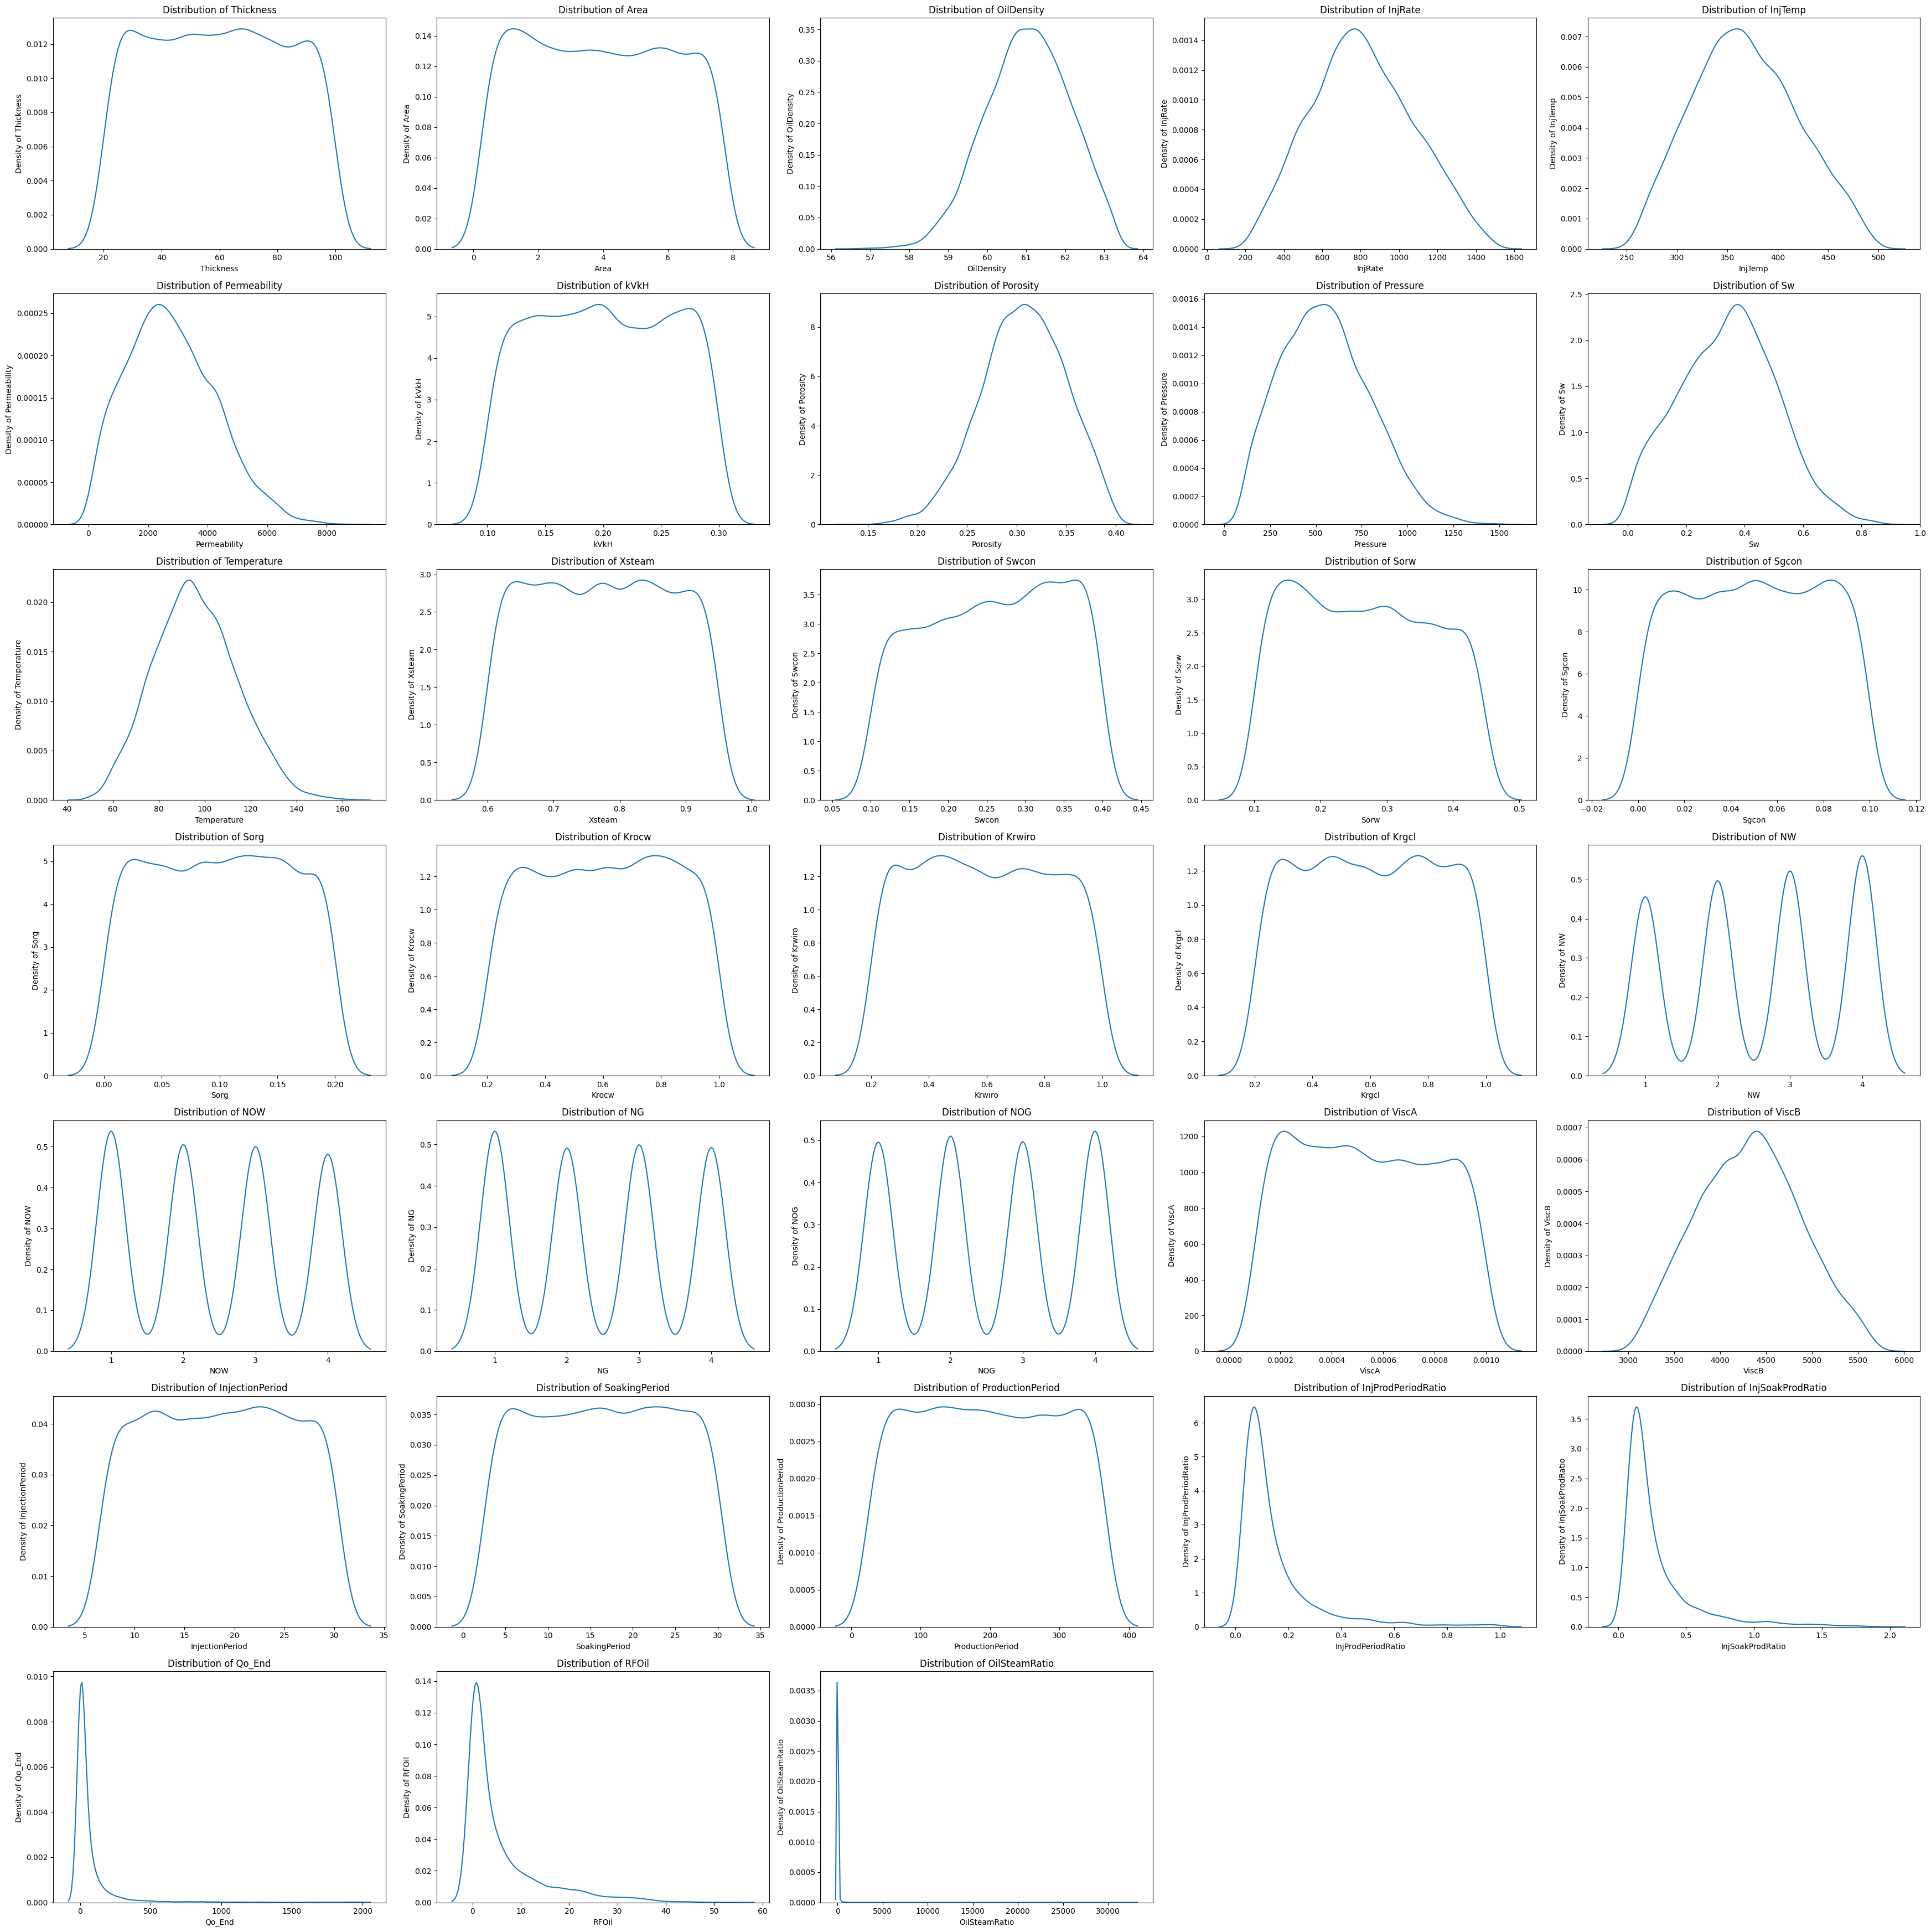

In [13]:
# Kdeplot
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(35, 35))
ax = ax.flatten()

for i, col in enumerate(all_columns) :
    sns.kdeplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Density of {col}')
    ax[i].set_xlabel(f'{col}')

# Hide the 34th and 35th plots (index 33 and 34)
ax[33].axis('off')
ax[34].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# ?st.probplot

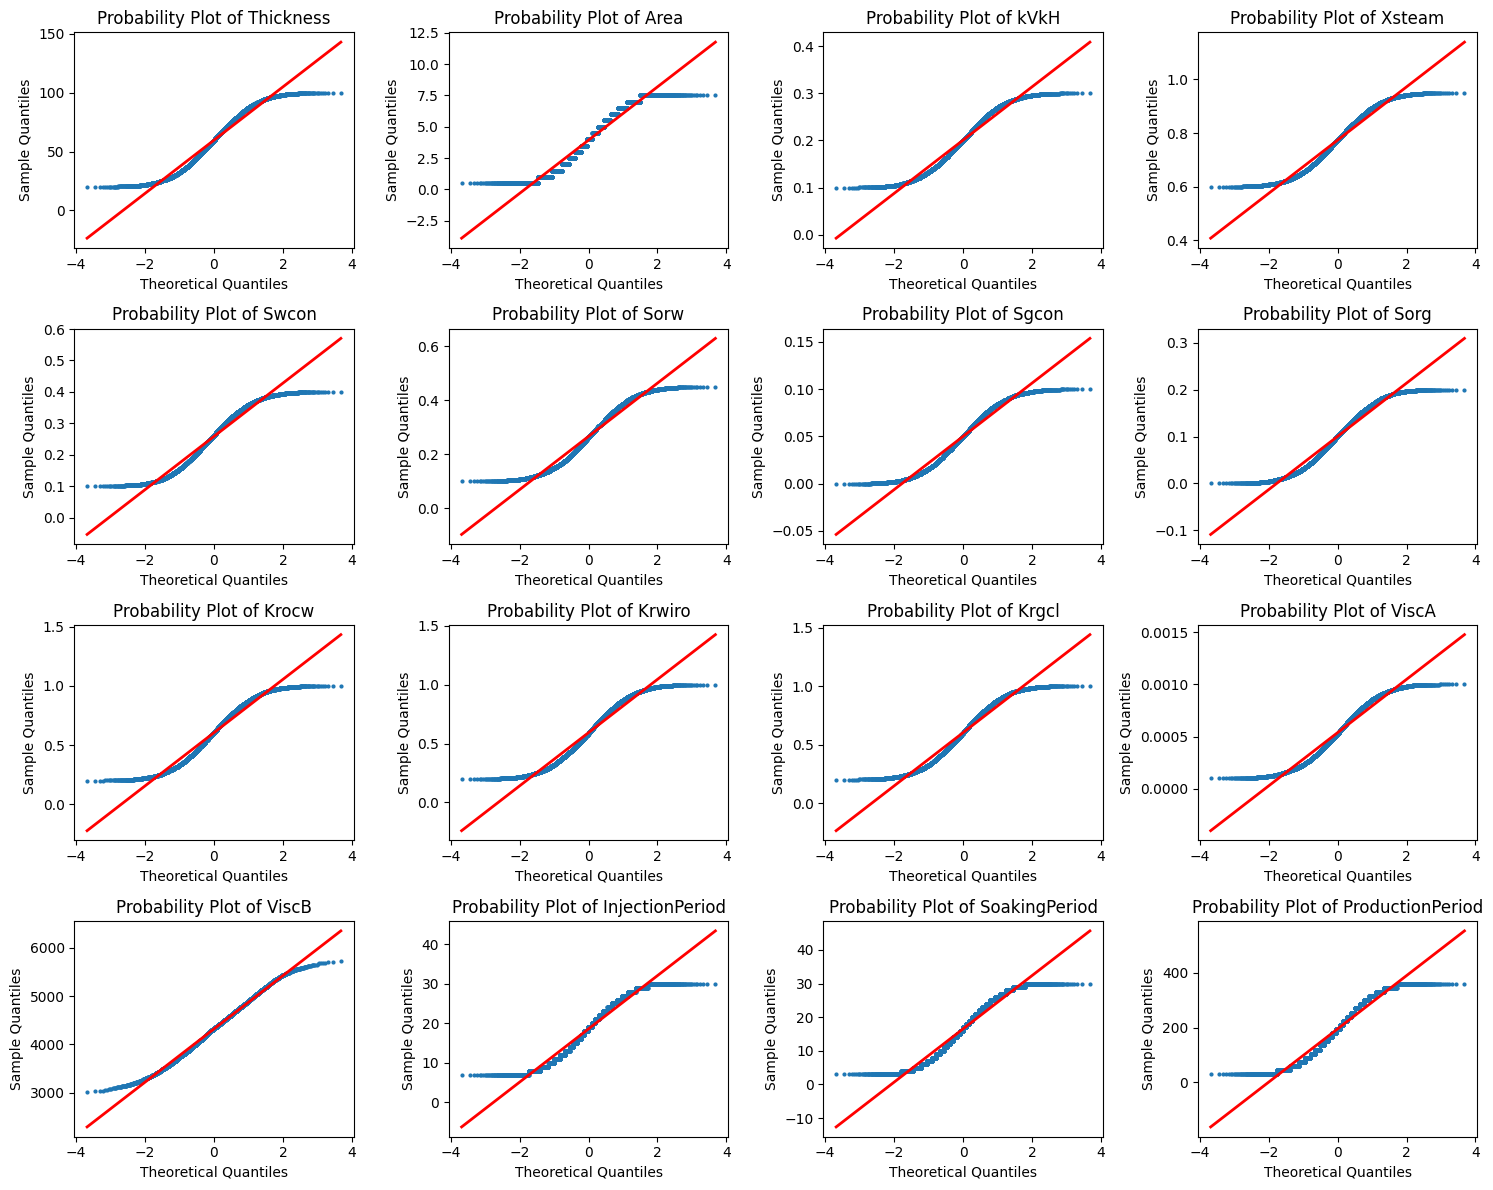

In [15]:
# Quantile-quantile (Q-Q) plot
columns_to_check = ["Thickness", "Area", "kVkH", "Xsteam", "Swcon", "Sorw", "Sgcon", "Sorg",
                    "Krocw", "Krwiro", "Krgcl", "ViscA", "ViscB", "InjectionPeriod", "SoakingPeriod", "ProductionPeriod"]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(columns_to_check):
    (osm, osr), (slope, intercept, r) = st.probplot(df[col].values, dist="norm")
    axes[i].plot(osm, osr, 'o', markersize=2)
    axes[i].plot(osm, slope * osm + intercept, 'r', linewidth=2)
    axes[i].set_title(f'Probability Plot of {col}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import skew, kurtosis, kstest
from diptest import diptest

def analyze_distribution(df, all_columns):
    distribution_type_list = []
    skew_val_list = []
    kurtosis_val_list = []
    p_value_ks_list = []
    p_value_dip_list = []
    mean_list = []
    median_list = []
    mode_list = []

    for column in all_columns:
        data = df[column].dropna()

        mean = round(data.mean(), 3)
        median = data.median()
        mode = data.mode().iloc[0]  # Take the first mode if there are multiple

        skew_val = round(skew(data, nan_policy="omit"), 3)
        kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

        # Scale data to the range [0, 1]
        data_min, data_max = data.min(), data.max()
        scaled_data = (data - data_min) / (data_max - data_min)

        threshold_pvalue = 0.05

        try:
            # Kolmogorov-Smirnov Test for uniform distribution
            _, p_value_ks = kstest(scaled_data, 'uniform')

            # Perform Dip Test for multimodal distribution
            _, p_value_dip = diptest(data)

            # Determine the type of distribution
            if p_value_dip < threshold_pvalue:
                distribution_type = "Multimodal Distribution"
            elif p_value_ks > threshold_pvalue and abs(kurtosis_val + 1.2) < 0.5:
                distribution_type = "Uniform Distribution"

            elif abs(skew_val) < 0.2 and abs(kurtosis_val) < 0.2:
                distribution_type = "Normal Distribution (Symmetric)"
                
            else:
                # Use mean-median-mode relationship
                if mean < median < mode:
                    distribution_type = "Negatively Skewed"
                elif mean > median > mode:
                    distribution_type = "Positively Skewed"
                else:
                    # Fallback to skewness value if mean-median-mode relationship is inconclusive
                    if skew_val < -0.2:
                        distribution_type = "Negatively Skewed"
                    elif skew_val > 0.2:
                        distribution_type = "Positively Skewed"
                    else:
                        distribution_type = "Approximately Symmetric"

                # Add intensity of skewness
                if abs(skew_val) >= 1:
                    distribution_type = "Highly " + distribution_type
                elif abs(skew_val) >= 0.5:
                    distribution_type = "Moderately " + distribution_type

            distribution_type_list.append(distribution_type)
            skew_val_list.append(skew_val)
            kurtosis_val_list.append(kurtosis_val)
            p_value_ks_list.append(round(p_value_ks, 3))
            p_value_dip_list.append(round(p_value_dip, 3))
            mean_list.append(mean)
            median_list.append(median)
            mode_list.append(mode)
        
        except Exception as e:
            print(f"Error processing column {column}: {str(e)}")
            
    dist = pd.DataFrame({
        "Column Name": all_columns,
        "Mean": mean_list,
        "Median": median_list,
        "Mode": mode_list,
        "Skewness": skew_val_list,
        "Kurtosis": kurtosis_val_list,
        "p-value_ks": p_value_ks_list,
        "p-value_dip": p_value_dip_list,
        "Type of Distribution": distribution_type_list
    })

    return dist

result = analyze_distribution(df, all_columns)
result

Column Name      Mean       Median          Mode  Skewness  \
0            Thickness    59.656    59.649816  2.003194e+01     0.013   
1                 Area     3.932     4.000000  1.000000e+00     0.038   
2           OilDensity    61.034    61.059831  6.014005e+01    -0.211   
3              InjRate   811.335   796.963710  2.037951e+02     0.158   
4              InjTemp   368.168   365.420260  2.534122e+02     0.172   
5         Permeability  2779.948  2650.241300  1.017303e+02     0.429   
6                 kVkH     0.201     0.200011  1.000112e-01     0.001   
7             Porosity     0.307     0.307892  2.834405e-01    -0.230   
8             Pressure   554.367   539.099710  1.002665e+02     0.388   
9                   Sw     0.343     0.349038  8.700708e-04     0.094   
10         Temperature    96.085    95.152711  1.155930e+02     0.235   
11              Xsteam     0.774     0.774358  6.000294e-01     0.009   
12               Swcon     0.259     0.262793  1.000684e-01    -0.128   
13                Sorw     0.266     0.263249  1.001346e-01     0.099   
14               Sgcon     0.050     0.050421  5.242415e-07    -0.020   
15                Sorg     0.100     0.100850  1.006425e-01    -0.005   
16               Krocw     0.605     0.609054  2.001219e-01    -0.030   
17              Krwiro     0.593     0.585485  9.354376e-01     0.036   
18               Krgcl     0.602     0.598902  2.002433e-01     0.000   
19                  NW     2.583     3.000000  4.000000e+00    -0.098   
20                 NOW     2.457     2.000000  1.000000e+00     0.048   
21                  NG     2.473     2.000000  1.000000e+00     0.027   
22                 NOG     2.516     3.000000  4.000000e+00    -0.012   
23               ViscA     0.001     0.000526  1.000974e-04     0.068   
24               ViscB  4319.743  4324.674300  3.012244e+03     0.069   
25     InjectionPeriod    18.566    19.000000  2.300000e+01    -0.011   
26       SoakingPeriod    16.515    17.000000  1.700000e+01    -0.010   
27    ProductionPeriod   195.308   195.000000  6.000000e+01     0.012   
28  InjProdPeriodRatio     0.148     0.095238  6.666667e-02     2.742   
29    InjSoakProdRatio     0.280     0.177778  1.333333e-01     2.590   
30              Qo_End    61.177    11.979492  0.000000e+00     6.443   
31               RFOil     5.764     2.182558  4.242272e-01     2.031   
32       OilSteamRatio    15.613     0.948753  3.216089e-03    75.808   

    Kurtosis  p-value_ks  p-value_dip      Type of Distribution  
0     -1.195       0.627        0.586      Uniform Distribution  
1     -1.239       0.000        0.000   Multimodal Distribution  
2     -0.262       0.000        0.962         Negatively Skewed  
3     -0.558       0.000        0.999         Positively Skewed  
4     -0.618       0.000        1.000         Positively Skewed  
5     -0.208       0.000        0.993         Positively Skewed  
6     -1.199       0.425        0.045   Multimodal Distribution  
7     -0.229       0.000        0.995         Negatively Skewed  
8     -0.225       0.000        0.753         Positively Skewed  
9     -0.421       0.000        0.995   Approximately Symmetric  
10    -0.140       0.000        0.999         Positively Skewed  
11    -1.207       0.635        0.535      Uniform Distribution  
12    -1.181       0.000        0.992   Approximately Symmetric  
13    -1.201       0.000        0.932         Positively Skewed  
14    -1.197       0.893        0.782      Uniform Distribution  
15    -1.195       0.646        0.417      Uniform Distribution  
16    -1.198       0.148        0.776      Uniform Distribution  
17    -1.201       0.035        0.698   Approximately Symmetric  
18    -1.216       0.496        0.260      Uniform Distribution  
19    -1.345       0.000        0.000   Multimodal Distribution  
20    -1.364       0.000        0.000   Multimodal Distribution  
21    -1.376       0.000        0.000   Multimodal Distribution  
22    -1.3

Distribution types of each numerical column can be seen in above dataframe.

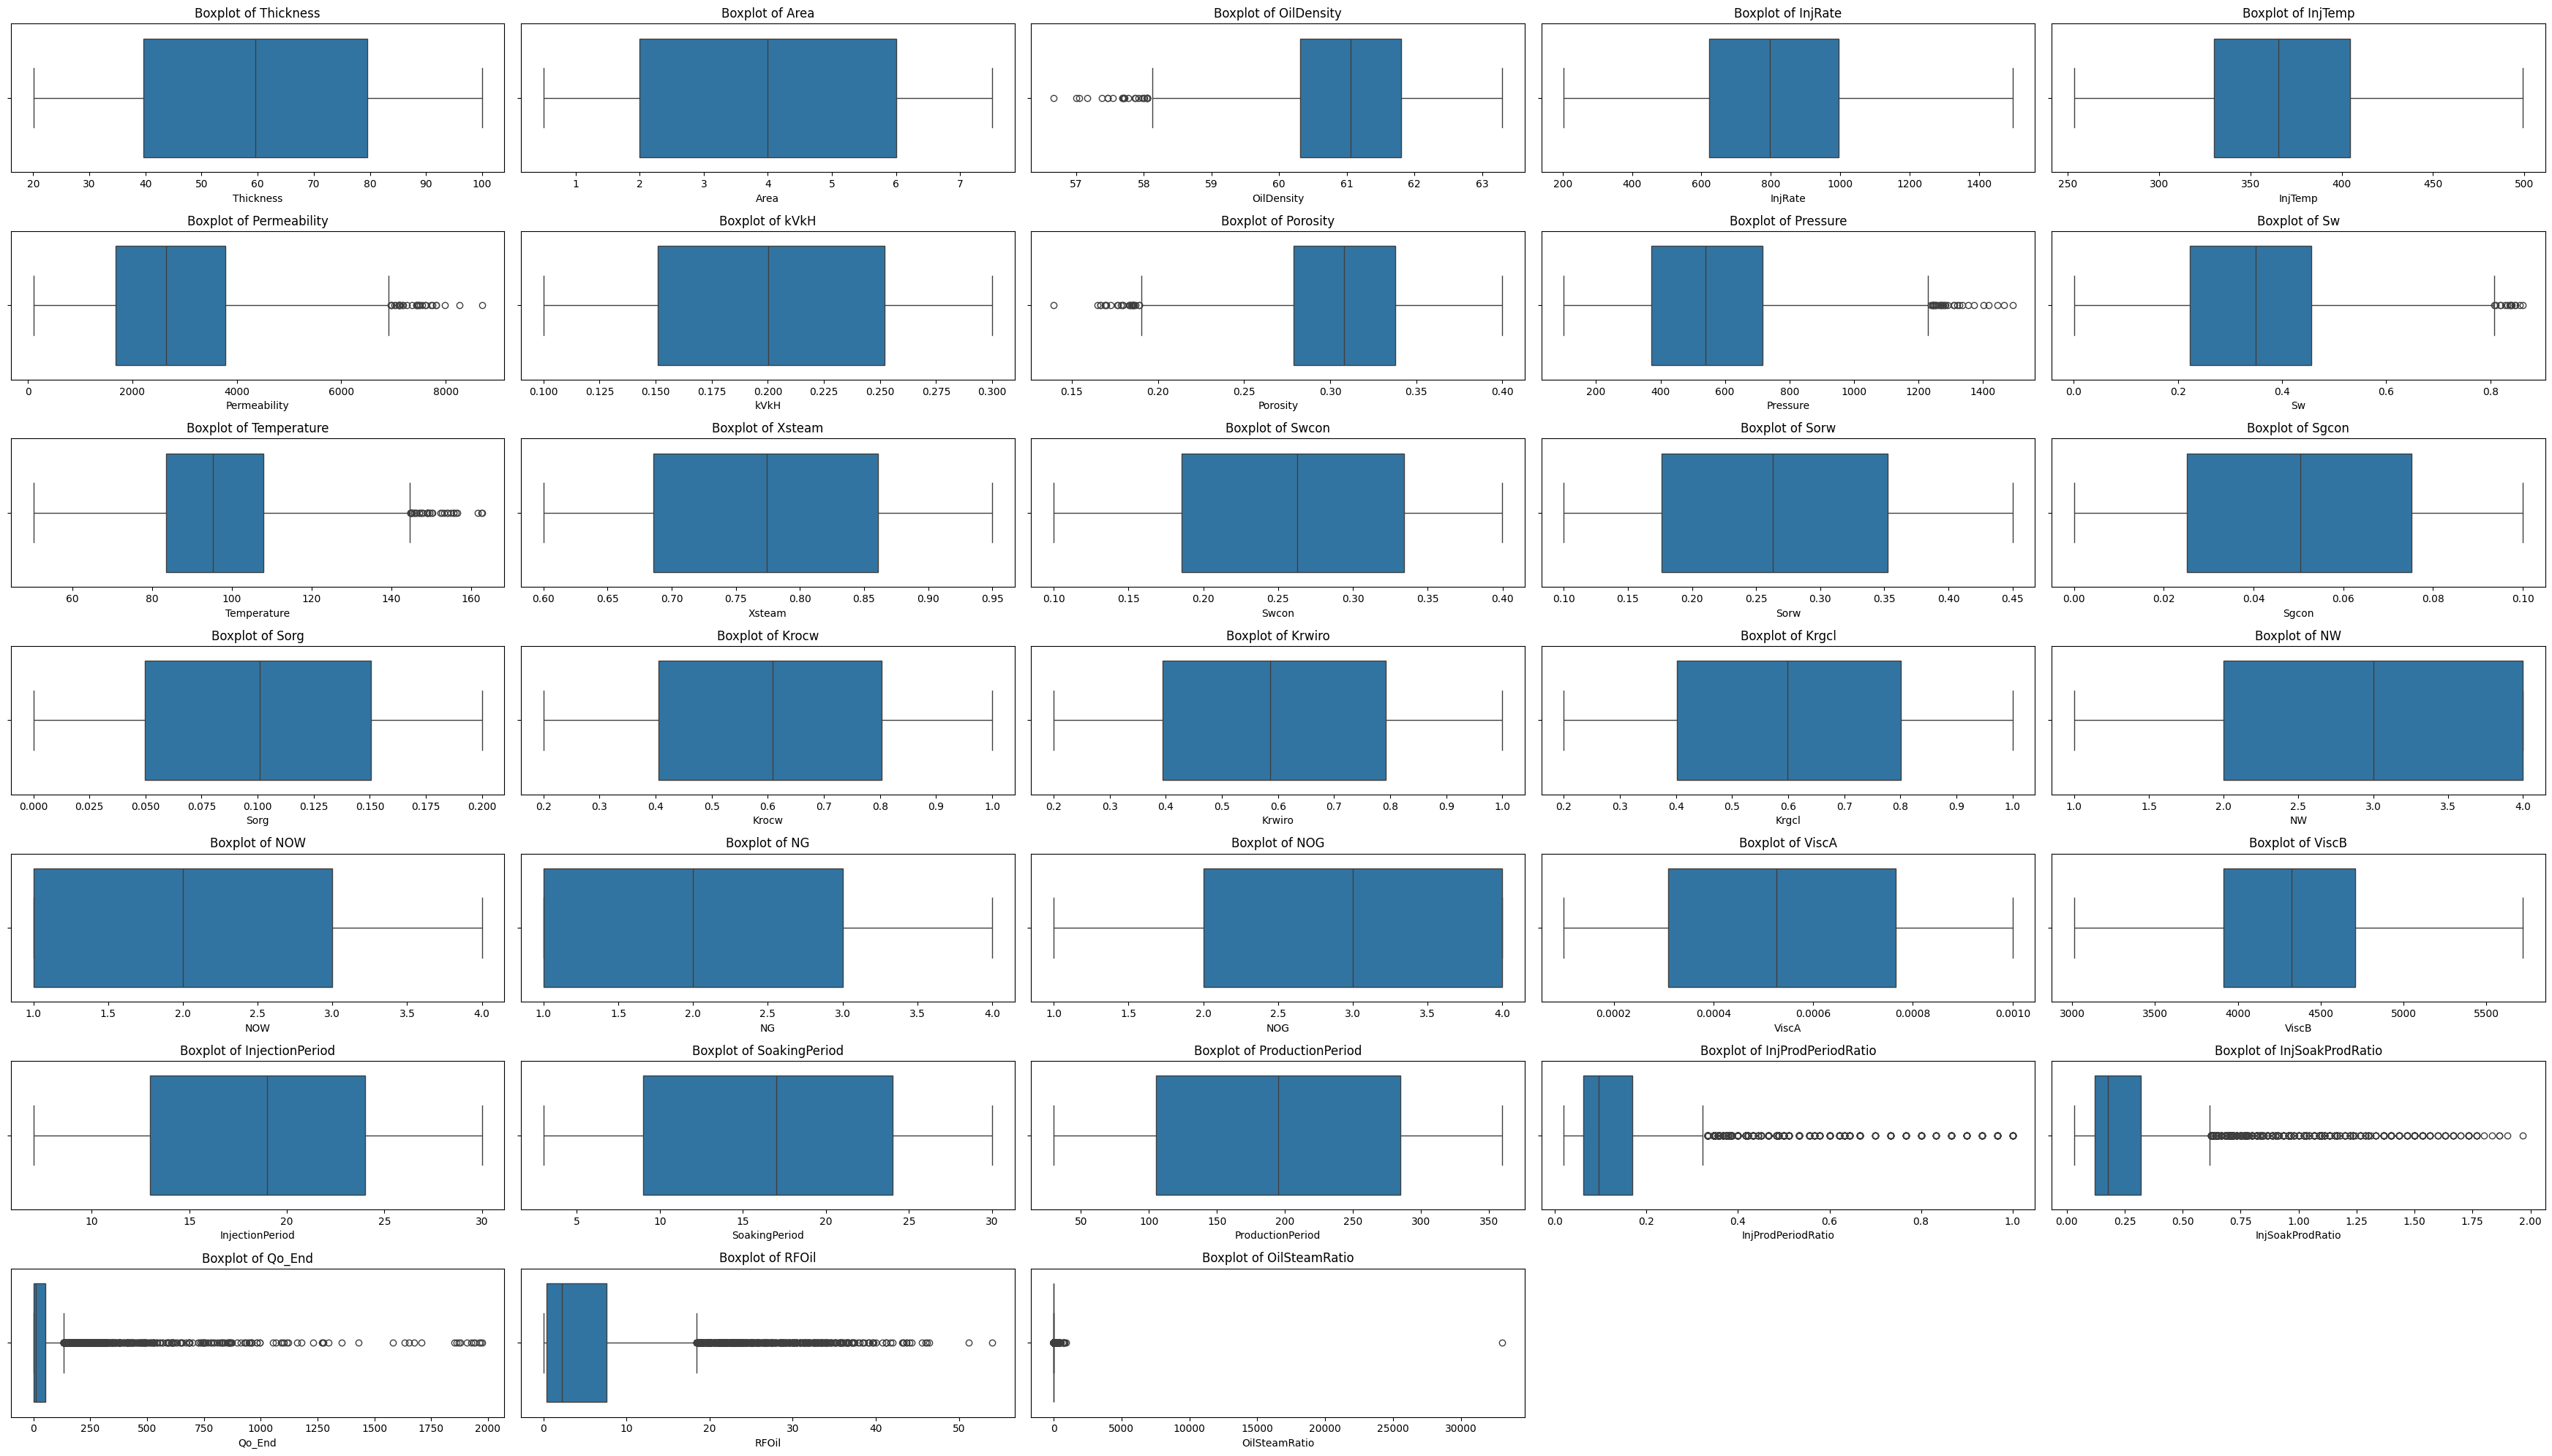

In [17]:
# Boxplot
fig, ax = plt.subplots(nrows=7, ncols=5, figsize=(35, 20))
ax = ax.flatten()

for i, col in enumerate(all_columns) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

# Hide the 34th and 35th plots (index 33 and 34)
ax[33].axis('off')
ax[34].axis('off')

plt.tight_layout()
plt.show()

Some of the columns have outliers, but not sure yet whether I should filter them or not since I don't really understand the context or domain importance of the columns. So as for now we will keep just keep it that way. If we need to filter them out then we will be using the code of filtering in data processing

In [18]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in all_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':all_columns,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 5949
Amount of Outlier Rows : 2232
Amount of Non-Outlier Rows : 3717
Percentage of Outliers : 37.52



Column Name  Outlier Exist  Lower Limit  Upper Limit  Outlier Data  \
0            Thickness          False   -20.270635   139.340949             0   
1                 Area          False    -4.000000    12.000000             0   
2           OilDensity           True    58.062154    64.052082            25   
3              InjRate          False    62.839765  1556.765805             0   
4              InjTemp          False   218.517225   516.062145             0   
5         Permeability           True -1473.523850  6938.150950            31   
6                 kVkH          False    -0.000680     0.403655             0   
7             Porosity           True     0.190202     0.426319            26   
8             Pressure           True  -144.442710  1232.036170            30   
9                   Sw           True    -0.126812     0.806739            14   
10         Temperature           True    46.728802   144.731647            36   
11              Xsteam          False     0.422732     1.123561             0   
12               Swcon          False    -0.036922     0.556822             0   
13                Sorw          False    -0.088904     0.617576             0   
14               Sgcon          False    -0.050003     0.150375             0   
15                Sorg          False    -0.101274     0.301321             0   
16               Krocw          False    -0.192864     1.401001             0   
17              Krwiro          False    -0.202230     1.387959             0   
18               Krgcl          False    -0.199030     1.401562             0   
19                  NW          False    -1.000000     7.000000             0   
20                 NOW          False    -2.000000     6.000000             0   
21                  NG          False    -2.000000     6.000000             0   
22                 NOG          False    -1.000000     7.000000             0   
23               ViscA          False    -0.000376     0.001451             0   
24               ViscB          False  2717.791350  5902.498950             0   
25     InjectionPeriod          False    -3.500000    40.500000             0   
26       SoakingPeriod          False   -13.500000    46.500000             0   
27    ProductionPeriod          False  -165.000000   555.000000             0   
28  InjProdPeriodRatio           True    -0.101768     0.332576           567   
29    InjSoakProdRatio           True    -0.176970     0.618182           563   
30              Qo_End           True   -78.408691   133.001464           663   
31               RFOil           True   -10.431145    18.436656           561   
32       OilSteamRatio           True    -4.730385     8.310180           699   

    Non-Outlier Data  Percentage of Outlier  
0               5949               0.000000  
1               5949               0.000000  
2               5924               0.420239  
3               5949               0.000000  
4               5949               0.000000  
5               5918               0.521096  
6               5949               0.000000  
7               5923               0.437048  
8               5919               0.504286  
9               5935               0.235334  
10              5913               0.605144  
11              5949               0.000000  
12              5949               0.000000  
13              5949               0.000000  
14              5949               0.000000  
15              5949               0.000000  
16              5949               0.000000  
17              5949               0.000000  
18              5949               0.000000  
19              5949               0.000000  
20              5949               0.000000  
21              5949               0.000000  
22              5949               0.000000  
23              5949               0.000000  
24              5949               0.000000  
25              5949               0.000000  
26            

**The missing values are mostly on the target variables.**

## Multivariate Analysis

In [19]:
# # Pairplot of numerical features
# sns.pairplot(data=df, diag_kind='kde')
# plt.tight_layout()
# plt.show()

Mostly the relation are non-linear, so we will be using spearmann method to check the correlation value.

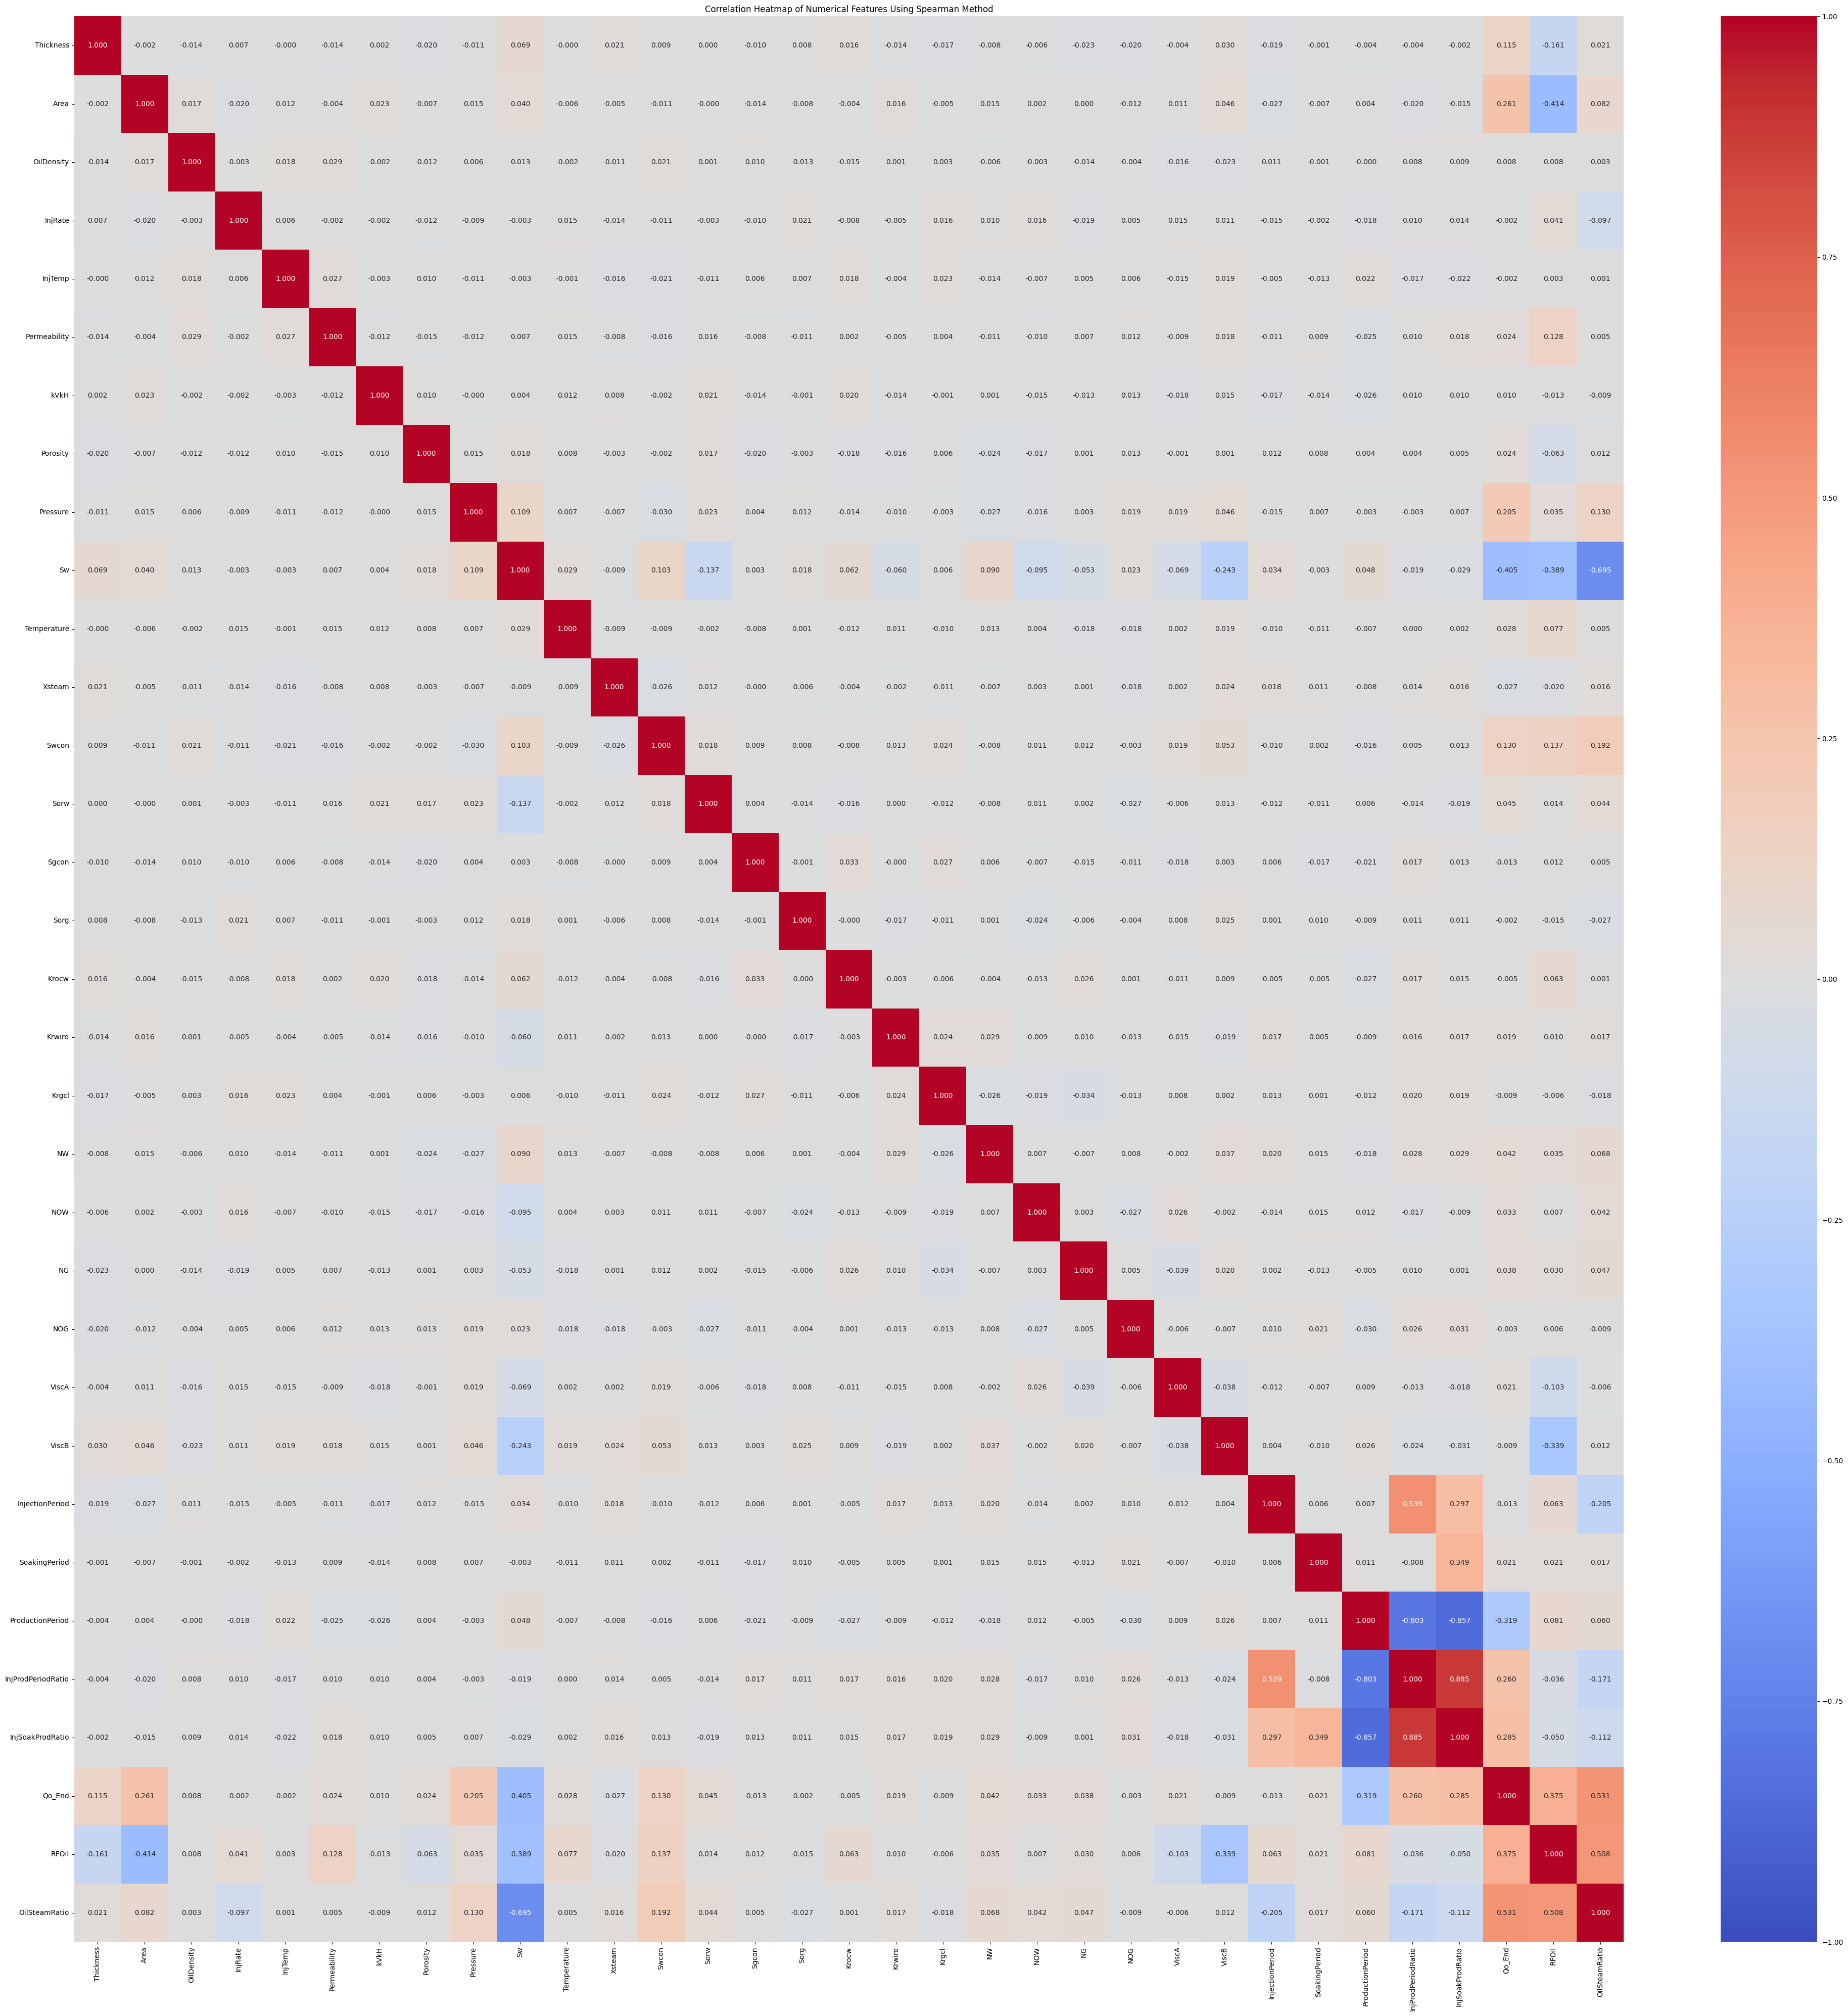

In [20]:
# Heatmap of numerical values (Spearman method)
# fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 20))

plt.figure(figsize=(40, 40))
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features Using Spearman Method')

# sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1, ax=ax[1])
# ax[1].set_title('Correlation Heatmap of Numerical Features Using Kendall Method')

plt.tight_layout()
plt.show()

In [21]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :] # Filter for the feature correlation by itself
flat_cm = flat_cm[~flat_cm['A'].isin(target_columns) & ~flat_cm['B'].isin(target_columns)] # Filter out the target variable(s)

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True) # Filter for the feature correlation of A-B then B-A
redundan_cm

A          B  Corr Value Corr Type
0           Sw      ViscB    0.243194  Negative
1           Sw       Sorw    0.136650  Negative
2     Pressure         Sw    0.108656  Positive
3        Swcon         Sw    0.103377  Positive
4          NOW         Sw    0.094521  Negative
..         ...        ...         ...       ...
295    InjTemp  Thickness    0.000213  Negative
296      Krocw       Sorg    0.000172  Negative
297       Sorw     Krwiro    0.000144  Positive
298  Thickness       Sorw    0.000128  Positive
299         NG       Area    0.000088  Positive

[300 rows x 4 columns]

There are no redundancy in feature-feature correlation.

In [22]:
# Feature-Target correlation representation in tabular form 
corr_target = pd.DataFrame()
for target in target_columns:
    corr = df.corrwith(df[target], method='spearman', numeric_only=True)
    corr = corr.to_frame(name=target)
    corr_target = pd.concat([corr_target, corr], axis=1)

# Reset index and melt the dataframe
corr = corr_target.reset_index().melt(id_vars='index', var_name='Target', value_name='Corr Value')
corr = corr[~corr['index'].isin(target_columns)]  # Remove rows where 'index' is in target_columns
corr = corr.rename(columns={'index': 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].abs()
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

Feature              Target  Corr Value Corr Type
0             Sw       OilSteamRatio    0.694692  Negative
1           Area               RFOil    0.414146  Negative
2             Sw              Qo_End    0.404547  Negative
3             Sw               RFOil    0.388760  Negative
4          ViscB               RFOil    0.339094  Negative
..           ...                 ...         ...       ...
195         Sorg     InjectionPeriod    0.000837  Positive
196        Krgcl       SoakingPeriod    0.000598  Positive
197   OilDensity       SoakingPeriod    0.000580  Negative
198  Temperature  InjProdPeriodRatio    0.000202  Positive
199   OilDensity    ProductionPeriod    0.000160  Negative

[200 rows x 4 columns]

There are no strongly correlated (corr > 0.7) feature to all 8 target variables. But there are so much feature that have very low correlation to targets.

In [23]:
# Checking of specific target variable (Change based on what we want to check)
corr_target_InjectionPeriod = corr[corr["Target"] == "InjectionPeriod"]
print(len(corr_target_InjectionPeriod))
corr_target_InjectionPeriod

25


Feature           Target  Corr Value Corr Type
31             Sw  InjectionPeriod    0.034329  Positive
44           Area  InjectionPeriod    0.026631  Negative
59             NW  InjectionPeriod    0.020236  Positive
64      Thickness  InjectionPeriod    0.019017  Negative
70         Xsteam  InjectionPeriod    0.017951  Positive
77           kVkH  InjectionPeriod    0.017136  Negative
78         Krwiro  InjectionPeriod    0.017117  Positive
91       Pressure  InjectionPeriod    0.015090  Negative
92        InjRate  InjectionPeriod    0.014536  Negative
95            NOW  InjectionPeriod    0.013609  Negative
102         Krgcl  InjectionPeriod    0.012963  Positive
109      Porosity  InjectionPeriod    0.012264  Positive
111         ViscA  InjectionPeriod    0.011803  Negative
112          Sorw  InjectionPeriod    0.011742  Negative
116  Permeability  InjectionPeriod    0.011213  Negative
117    OilDensity  InjectionPeriod    0.011161  Positive
125           NOG  InjectionPeriod    0.010157  Positive
131         Swcon  InjectionPeriod    0.009877  Negative
133   Temperature  InjectionPeriod    0.009612  Negative
159         Sgcon  InjectionPeriod    0.005504  Positive
160         Krocw  InjectionPeriod    0.005490  Negative
166       InjTemp  InjectionPeriod    0.004800  Negative
172         ViscB  InjectionPeriod    0.004084  Positive
187            NG  InjectionPeriod    0.002142  Positive
195          Sorg  InjectionPeriod    0.000837  Positive

# **STAGE 2 : DATA PREPROCESSING**

In [24]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Thickness  Area  OilDensity     InjRate    InjTemp  Permeability  \
4379  64.941500   1.5   61.525468   617.14687  351.29712    5931.63010   
1173  95.660276   4.0   61.783609   941.67041  329.13417    2018.98470   
4227  82.304027   1.0   60.306780  1141.51960  402.79165    5189.80080   
3136  59.095233   3.0   58.574276   752.05689  368.65690    4892.41320   
4209  62.277698   1.5   60.138873  1080.55810  449.41281     518.75361   

          kVkH  Porosity   Pressure        Sw  Temperature    Xsteam  \
4379  0.165251  0.337506  403.78188  0.403560   136.572210  0.695319   
1173  0.166517  0.337554  744.85164  0.224939    84.172984  0.757837   
4227  0.229505  0.361242  387.40260  0.042957    77.141582  0.933210   
3136  0.239362  0.276377  639.79082  0.080892    90.862312  0.871649   
4209  0.200977  0.295558  644.65224  0.534828    74.132969  0.805749   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
4379  0.334773  0.290483  0.085164  0.031249  0.559391  0.274365  0.295920   
1173  0.306915  0.410164  0.073267  0.151649  0.238696  0.462044  0.454119   
4227  0.343458  0.303164  0.066978  0.002332  0.936925  0.537737  0.973083   
3136  0.300418  0.350816  0.093595  0.040384  0.907731  0.261371  0.231076   
4209  0.257329  0.179587  0.067073  0.171144  0.724770  0.452292  0.233006   

      NW  NOW  NG  NOG     ViscA      ViscB  InjectionPeriod  SoakingPeriod  \
4379   1    2   1    2  0.000791  4368.6668               14             21   
1173   3    3   1    4  0.000831  4997.9665                9             24   
4227   4    3   2    1  0.000346  3700.3941               12             20   
3136   3    2   4    4  0.000645  4547.2700               27             10   
4209   1    3   4    4  0.000537  3731.7293               30             15   

      ProductionPeriod  InjProdPeriodRatio  InjSoakProdRatio      Qo_End  \
4379                45            0.311111          0.777778  103.062020   
1173               345            0.026087          0.095652    3.973023   
4227               330            0.036364          0.096970    0.000000   
3136               165            0.163636          0.224242  212.328140   
4209                90            0.333333          0.500000    0.011353   

          RFOil  OilSteamRatio  
4379   2.555059       0.512681  
1173   0.150058     412.555450  
4227  21.990620       4.110918  
3136  15.759126       3.984650  
4209   0.366391       0.014511

## Handling Outliers

Handling outliers is only applied to feature columns

In [25]:
feature_columns

['Thickness',
 'Area',
 'OilDensity',
 'InjRate',
 'InjTemp',
 'Permeability',
 'kVkH',
 'Porosity',
 'Pressure',
 'Sw',
 'Temperature',
 'Xsteam',
 'Swcon',
 'Sorw',
 'Sgcon',
 'Sorg',
 'Krocw',
 'Krwiro',
 'Krgcl',
 'NW',
 'NOW',
 'NG',
 'NOG',
 'ViscA',
 'ViscB']

In [26]:
# Filter the DataFrame to get only rows with outliers
outlier_columns_df = check_outliers[check_outliers["Outlier Data"] > 0]

# Check if the "Column Name" values are in feature_columns
outlier_columns = outlier_columns_df[outlier_columns_df["Column Name"].isin(feature_columns)]

# Extract the unique column names
outlier_column_names = outlier_columns["Column Name"].unique()
outlier_column_names

array(['OilDensity', 'Permeability', 'Porosity', 'Pressure', 'Sw',
       'Temperature'], dtype=object)

In [27]:
# Outlier handling and create outliers-filtered new dataframe

print(f'Rows before removing outliers: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier_column_names:
    Q1 = df_preprocessed[col].quantile(0.25)
    Q3 = df_preprocessed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filtered_entries = ((df_preprocessed[col] >= lower_bound) & (df_preprocessed[col] <= upper_bound)) & filtered_entries
    
df_preprocessed = df_preprocessed[filtered_entries]

print(f'Rows after removing outliers: {len(df_preprocessed)}')

df_preprocessed

Rows before removing outliers: 5949
Rows after removing outliers: 5788


Thickness  Area  OilDensity     InjRate    InjTemp  Permeability  \
0     39.824628   1.0   62.214501   751.34728  462.20765     832.06533   
1     65.026244   1.0   60.342411   581.50751  305.14547    2598.04390   
2     40.202023   0.5   61.902308   697.68516  356.48412    4391.08380   
3     71.850387   1.0   62.203022   620.03005  449.99169     511.99357   
4     36.984783   1.5   59.734051   907.04751  276.37770     449.83624   
...         ...   ...         ...         ...        ...           ...   
5943  97.073209   5.5   62.541793   932.05437  319.80661    2725.60710   
5945  87.024456   7.0   60.337470   619.37454  375.74582     588.58561   
5946  66.577565   5.5   60.372485   687.21770  352.73680    3655.58640   
5947  86.921316   6.0   60.541859  1038.57790  327.78630    1229.85720   
5948  77.992595   1.5   60.977407   798.48620  439.01219     282.63633   

          kVkH  Porosity    Pressure        Sw  Temperature    Xsteam  \
0     0.148809  0.301224   581.38029  0.227685    67.889106  0.629472   
1     0.282943  0.217929   523.48885  0.051366    85.752365  0.929950   
2     0.251650  0.308947   286.24688  0.085472   113.455130  0.852801   
3     0.290800  0.305564   427.08838  0.226790    87.536629  0.750641   
4     0.247424  0.266638   342.83004  0.052586   118.465410  0.765425   
...        ...       ...         ...       ...          ...       ...   
5943  0.179221  0.270286  1206.23190  0.608577    83.265066  0.804624   
5945  0.145092  0.379862   793.86213  0.510405    76.556824  0.677894   
5946  0.232081  0.328860   908.48130  0.546017    81.334023  0.946048   
5947  0.106178  0.277274  1049.18100  0.519556    84.242217  0.840681   
5948  0.240613  0.268045   948.15832  0.571239   109.530230  0.769247   

         Swcon      Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl  \
0     0.227626  0.295791  0.055293  0.012726  0.863334  0.209767  0.589825   
1     0.245549  0.133923  0.033127  0.196422  0.285480  0.498191  0.550472   
2     0.235673  0.366999  0.002201  0.002481  0.602281  0.372117  0.492460   
3     0.374841  0.430492  0.081062  0.196790  0.322498  0.512776  0.621836   
4     0.276477  0.315245  0.073552  0.100621  0.620193  0.663039  0.595623   
...        ...       ...       ...       ...       ...       ...       ...   
5943  0.200351  0.155608  0.031487  0.062027  0.202660  0.898399  0.232364   
5945  0.290219  0.449067  0.010641  0.065236  0.887535  0.234815  0.219329   
5946  0.396116  0.273756  0.022435  0.137346  0.679492  0.302366  0.920118   
5947  0.362323  0.401904  0.015070  0.077145  0.762990  0.733675  0.567491   
5948  0.392675  0.347978  0.084395  0.087382  0.514664  0.435079  0.964932   

      NW  NOW  NG  NOG     ViscA      ViscB  InjectionPeriod  SoakingPeriod  \
0      4    4   1    4  0.000811  3506.6960               12              4   
1      1    2   2    4  0.000845  4349.5874               19             26   
2      2    1   4    4  0.000785  4597.4855               10             20   
3      3    2   4    4  0.000953  3527.8404               12             29   
4      1    4   1    3  0.000177  3978.8902                9             18   
...   ..  ...  ..  ...       ...        ...              ...            ...   
5943   3    3   4    2  0.000337  4220.7473               10              7   
5945   1    4   1    2  0.000137  4765.4342               15             16   
5946   1    3   4    3  0.000667  5204.2672               18              7   
5947   4    4   4    4  0.000700  4998.5847               14             13   
5948   3    1   2    1  0.000846  4924.5378               30             27   

      ProductionPeriod  InjProdPeriodRatio  InjSoakProdRatio     Qo_End  \
0                  105            0.114286          0.152381  64.292969   
1                  330            0.057576          0.136364  21.792969   
2                   75            0.133333          0.400000  21.089846   
3                  315            0.038095          0.

## Feature Selection

### SelectKBest Feature Importance (Statistical Test)

In [28]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_preprocessed.copy()
df_feature_target_relation.head()

Thickness  Area  OilDensity    InjRate    InjTemp  Permeability      kVkH  \
0  39.824628   1.0   62.214501  751.34728  462.20765     832.06533  0.148809   
1  65.026244   1.0   60.342411  581.50751  305.14547    2598.04390  0.282943   
2  40.202023   0.5   61.902308  697.68516  356.48412    4391.08380  0.251650   
3  71.850387   1.0   62.203022  620.03005  449.99169     511.99357  0.290800   
4  36.984783   1.5   59.734051  907.04751  276.37770     449.83624  0.247424   

   Porosity   Pressure        Sw  Temperature    Xsteam     Swcon      Sorw  \
0  0.301224  581.38029  0.227685    67.889106  0.629472  0.227626  0.295791   
1  0.217929  523.48885  0.051366    85.752365  0.929950  0.245549  0.133923   
2  0.308947  286.24688  0.085472   113.455130  0.852801  0.235673  0.366999   
3  0.305564  427.08838  0.226790    87.536629  0.750641  0.374841  0.430492   
4  0.266638  342.83004  0.052586   118.465410  0.765425  0.276477  0.315245   

      Sgcon      Sorg     Krocw    Krwiro     Krgcl  NW  NOW  NG  NOG  \
0  0.055293  0.012726  0.863334  0.209767  0.589825   4    4   1    4   
1  0.033127  0.196422  0.285480  0.498191  0.550472   1    2   2    4   
2  0.002201  0.002481  0.602281  0.372117  0.492460   2    1   4    4   
3  0.081062  0.196790  0.322498  0.512776  0.621836   3    2   4    4   
4  0.073552  0.100621  0.620193  0.663039  0.595623   1    4   1    3   

      ViscA      ViscB  InjectionPeriod  SoakingPeriod  ProductionPeriod  \
0  0.000811  3506.6960               12              4               105   
1  0.000845  4349.5874               19             26               330   
2  0.000785  4597.4855               10             20                75   
3  0.000953  3527.8404               12             29               315   
4  0.000177  3978.8902                9             18               255   

   InjProdPeriodRatio  InjSoakProdRatio     Qo_End      RFOil  OilSteamRatio  
0            0.114286          0.152381  64.292969  23.634199       2.528684  
1            0.057576          0.136364  21.792969  22.026970       3.169897  
2            0.133333          0.400000  21.089846  21.993093       1.566492  
3            0.038095          0.130159  23.517580  20.947531       4.915453  
4            0.035294          0.105882   0.740234  20.159119       3.135612

In [29]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# List of target variables
target_variables = target_columns

# Features (excluding all target variables)
x_features_test = df_feature_target_relation.drop(columns=target_variables)

# Dictionary to store results
all_scores = {}

for target in target_variables:
    y_target_test = df_feature_target_relation[target]
    
    k_best = SelectKBest(score_func=mutual_info_regression, k='all')
    k_best.fit(x_features_test, y_target_test)
    
    all_scores[f'{target}_Score'] = k_best.scores_

# Create a DataFrame with all scores
feature_scores_df = pd.DataFrame(all_scores)
feature_scores_df['Feature'] = x_features_test.columns

# Calculate average score across all targets
score_columns = [col for col in feature_scores_df.columns if col.endswith('_Score')]
feature_scores_df['Average_Score'] = feature_scores_df[score_columns].mean(axis=1)

# Reorder columns to put 'Feature' first
columns_order = ['Feature'] + score_columns + ['Average_Score']
feature_scores_df = feature_scores_df[columns_order]

# Sort the DataFrame by the average score
feature_scores_df = feature_scores_df.sort_values('Average_Score', ascending=False)

# Reset index for clean display
feature_scores_df = feature_scores_df.reset_index(drop=True)

# Display the results
display(feature_scores_df)

Feature  InjectionPeriod_Score  SoakingPeriod_Score  \
0             Sw               0.018610             0.000000   
1           Area               0.022742             0.014559   
2          ViscB               0.000000             0.011203   
3       Pressure               0.000000             0.000000   
4        InjTemp               0.000000             0.002058   
5          Swcon               0.015358             0.000000   
6          Krgcl               0.006945             0.007177   
7          Krocw               0.000000             0.000000   
8       Porosity               0.000000             0.000000   
9         Krwiro               0.007782             0.003696   
10  Permeability               0.006147             0.000501   
11         Sgcon               0.000000             0.000000   
12          kVkH               0.000000             0.008676   
13   Temperature               0.000000             0.008171   
14         ViscA               0.000634             0.000000   
15       InjRate               0.000000             0.000000   
16           NOW               0.002317             0.000000   
17            NW               0.000000             0.010785   
18        Xsteam               0.005611             0.000000   
19     Thickness               0.000000             0.000000   
20           NOG               0.004104             0.000000   
21            NG               0.001762             0.006730   
22          Sorg               0.002562             0.008318   
23    OilDensity               0.000000             0.000000   
24          Sorw               0.002989             0.000000   

    ProductionPeriod_Score  InjProdPeriodRatio_Score  InjSoakProdRatio_Score  \
0                 0.000000                  0.000000                0.012975   
1                 0.002849                  0.019981                0.006579   
2                 0.000000                  0.000000                0.010252   
3                 0.023735                  0.002881                0.001763   
4                 0.015799                  0.000000                0.022502   
5                 0.007771                  0.000729                0.000000   
6                 0.005689                  0.022808                0.024207   
7                 0.000481                  0.022289                0.003461   
8                 0.007052                  0.018426                0.019033   
9                 0.000000                  0.013228                0.000333   
10                0.000000                  0.014312                0.000000   
11                0.003721                  0.024607                0.008153   
12                0.006818                  0.000000                0.010003   
13                0.000000                  0.008544                0.000000   
14                0.000000                  0.016798                0.001441   
15                0.000000                  0.000000                0.005933   
16                0.006860                  0.000000                0.000000   
17                0.000000                  0.000000                0.000000   
18                0.000000                  0.002819                0.000000   
19                0.005854                  0.000000                0.000000   
20                0.000000                  0.000000                0.001106   
21                0.007136                  0.000000                0.000000   
22                0.000000                  0.000000                0.001929   
23                0.000000                  0.007674                0.000000   
24                0.000000                  0.000000                0.004961   

    Qo_End_Score  RFOil_Score  OilSteamRatio_Score  Average_Score  
0       0.119541     0.110493             0.321471       0.072886  
1       0.071086     0.129452             0.033811       0.037632  
2       0.123868     0.079861             0.049560       0.

In [30]:
# Checking for 1 feature
feature_scores_df[["Feature", "InjectionPeriod_Score"]].sort_values(by="InjectionPeriod_Score", ascending=False)

Feature  InjectionPeriod_Score
1           Area               0.022742
0             Sw               0.018610
5          Swcon               0.015358
9         Krwiro               0.007782
6          Krgcl               0.006945
10  Permeability               0.006147
18        Xsteam               0.005611
20           NOG               0.004104
24          Sorw               0.002989
22          Sorg               0.002562
16           NOW               0.002317
21            NG               0.001762
14         ViscA               0.000634
8       Porosity               0.000000
7          Krocw               0.000000
11         Sgcon               0.000000
4        InjTemp               0.000000
13   Temperature               0.000000
15       InjRate               0.000000
17            NW               0.000000
3       Pressure               0.000000
19     Thickness               0.000000
2          ViscB               0.000000
23    OilDensity               0.000000
12          kVkH               0.000000

In [31]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_preprocessed.copy()

# Important features only based on correlation and K-best parameter
selected_features = df_preprocessed.columns

df_model = df_model[selected_features]

## Split Train and Test Data

- **Note : The features used depends on the experiment, the condition belows means feature columns + that/those features**

In [32]:
case_1_dropped_columns = target_columns # input features only
case_2_dropped_columns = [col for col in target_columns if col not in ["RFOil"]]

In [33]:
# Split Train and Test Data
X = df_model.drop(columns=case_2_dropped_columns)
y = df_model["InjectionPeriod"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {X_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {X_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (4630, 26)
Dimension of y_train data : (4630,)
Dimension of x_test data : (1158, 26)
Dimension of y_test data : (1158,)


## Feature Scalling

In [34]:
len(X_train.columns)

26

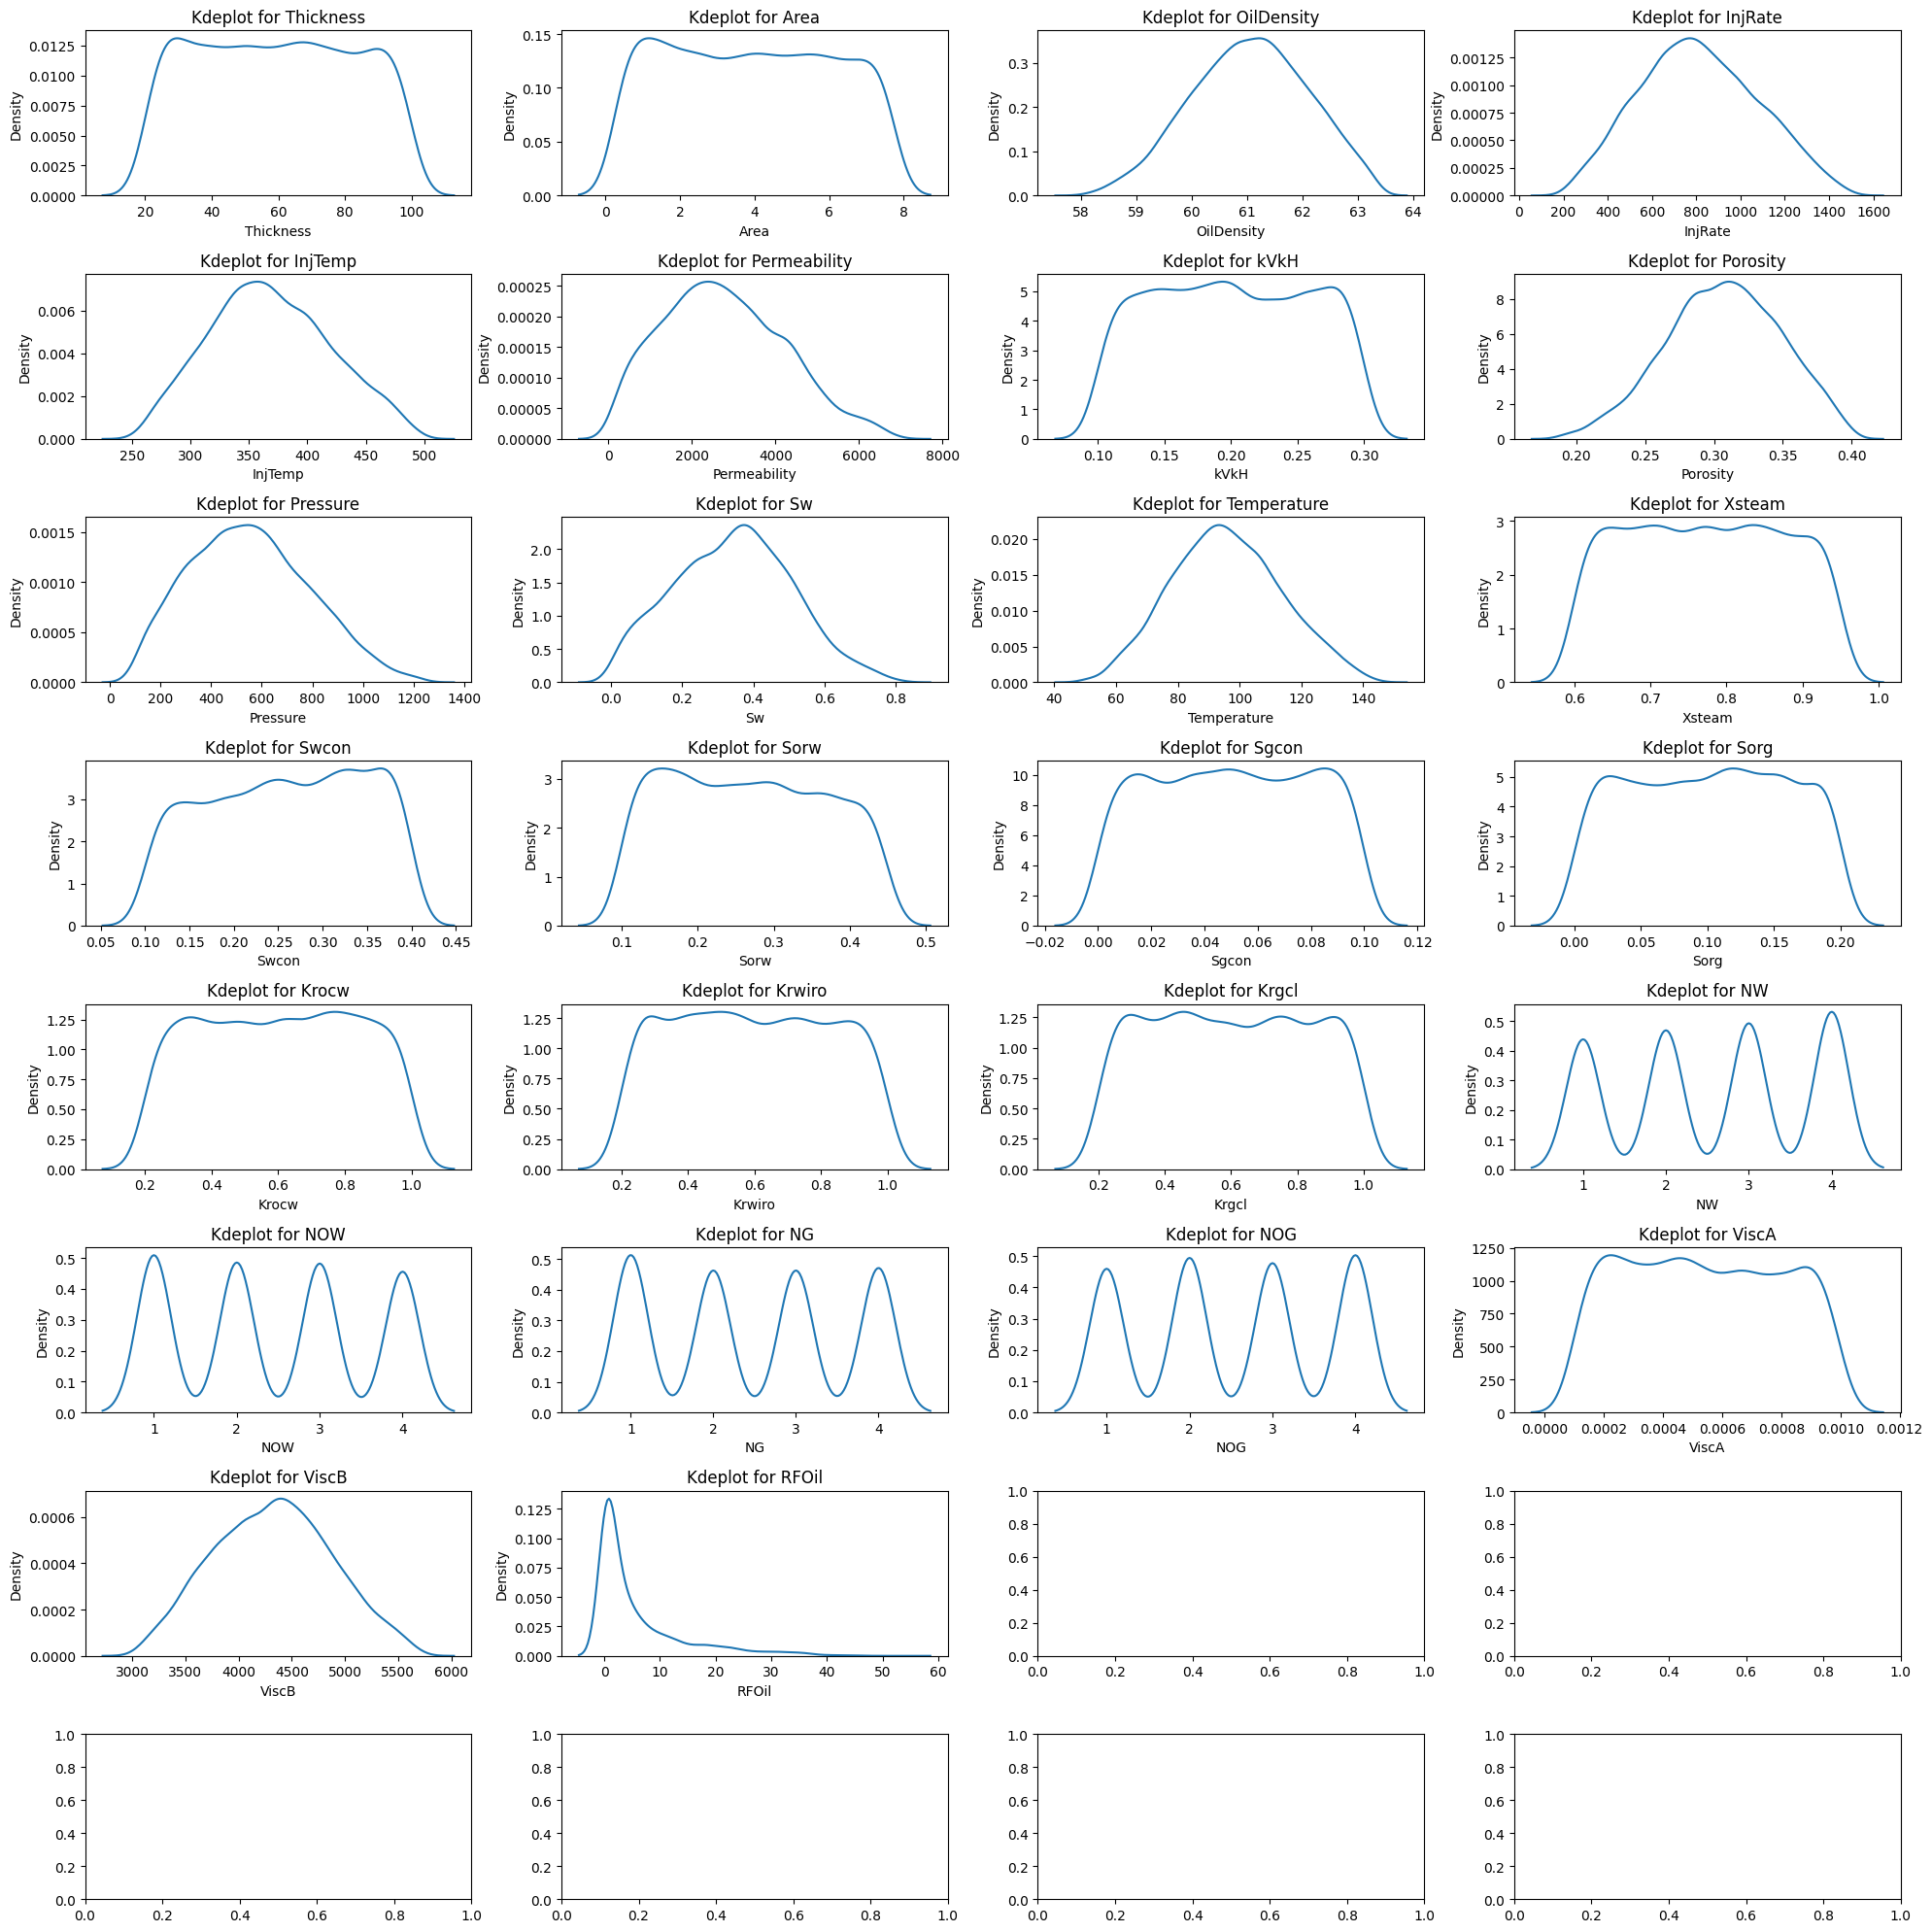

In [35]:
# Re-check distribution before scaling
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(X_train.columns) :
    sns.kdeplot(data=X_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

plt.tight_layout()
plt.show()

Based on the distribution above :

- **For uniform distributions:**

    - Normalization is generally a good choice as it preserves the uniform nature of the distribution while scaling it to a fixed range.


- **For multi-modal distributions:**

    Using standardization for feature scaling when the distribution is multi-modal may not be ideal. Here's a brief explanation why:

    1. Standardization assumes a normal distribution: It transforms features to have a mean of 0 and a standard deviation of 1, which works well for normally distributed data.

    2. Multi-modal distributions: These have multiple peaks, indicating distinct subgroups within the data. Standardization can obscure these important characteristics.

    3. Potential issues:
    - Loss of information about subgroups
    - Misrepresentation of the data's structure
    - Reduced effectiveness of algorithms that rely on distance measures

    Alternative approaches:

    1. Robust scaling: Using median and interquartile range instead of mean and standard deviation.
    2. Normalization: Scaling features to a fixed range (e.g., 0 to 1).
    3. Separate scaling: Treating each mode as a separate group and scaling them individually.
    4. Non-linear transformations: Applying methods like log transformation or Box-Cox to address non-normality.

- **For right-skewed distributions :**

    The goal is to make the distribution more symmetric and closer to normal. Here are some common transformations for right-skewed data:

    - Logarithmic transformation:

        - Most common for right-skewed data
        - log(x) or log(x + 1) if there are zeros in the data
        - Effective for data with a wide range of values


    - Square root transformation:

        - sqrt(x)
        - Less drastic than log transformation
        - Useful for count data or when log is too extreme

- **Exploring advanced techniques like:**

    - Quantile transformation: This can help in spreading out the most frequent values.

    - Power transforms (e.g., Box-Cox or Yeo-Johnson): These can help in making the distribution more Gaussian-like.

--------------------------------------------------------------------------------------

**Reminder About Choosing Scaling Methods**

If the issue is primarily with the range of values rather than the shape of the distributions, you can use scaling methods to bring all features to a similar scale without altering their distributions. Here are some common scaling methods you can consider:

1. **Min-Max Scaling (Normalization)**:
   - Scales the data to a fixed range, usually between 0 and 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Use when you know the minimum and maximum values for your features or when you want to bound the data within a specific range.

2. **Standard Scaling (Standardization)**:
   - Scales the data so that it has a mean of 0 and a standard deviation of 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - Use when the features are normally distributed or when you're using models that assume zero-centered data.

3. **Robust Scaling**:
   - Scales the data similarly to standard scaling but uses the median and the interquartile range (IQR) instead of the mean and standard deviation.
   - Formula: \( X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
   - Use when the data contains outliers or when the distribution is not normal.

4. **Max Abs Scaler**:
   - Scales each feature to its maximum absolute value.
   - Formula: \( X_{\text{scaled}} = \frac{X}{\max(|X|)} \)
   - Use when the features are sparse or when you want to preserve sparsity.

5. **Power Transformer (Yeo-Johnson or Box-Cox)**:
   - Applies a power transformation to make the data more Gaussian-like.
   - Use when the data is skewed or when you need to stabilize variance.

For your case where the overall feature distributions are near normal but the ranges vary significantly, Min-Max Scaling or Standard Scaling might be appropriate. If you're concerned about outliers, Robust Scaling could be a better choice. It's often a good idea to try different scaling methods and see which one works best for your specific dataset and model.

In [36]:
# Apply feature scalling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

ms = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

apply_normalization_columns = ['Thickness', 'Area', 'kVkH', 'Xsteam', 'Swcon', 'Sorw', 'Sgcon', 'Sorg',
                               'Krocw', 'Krwiro', 'Krgcl', 'NW', 'NOW', 'NG', 'NOG', 'ViscA']

apply_standardization_columns = ['OilDensity', 'InjRate', 'InjTemp', 'Permeability',
                                 'Porosity', 'Pressure', 'Sw', 'Temperature', 'ViscB']

# # Apply min-max scaling
# X_train[apply_normalization_columns] = ms.fit_transform(X_train[apply_normalization_columns])
# X_test[apply_normalization_columns] = ms.transform(X_test[apply_normalization_columns])

# # Apply standardization
# X_train[apply_standardization_columns] = ss.fit_transform(X_train[apply_standardization_columns])
# X_test[apply_standardization_columns] = ss.transform(X_test[apply_standardization_columns])

# # Testing standardization to all columns
# X_train[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
# X_test[X_test.columns] = ss.transform(X_test[X_test.columns])

# Testing robust scalling to all columns
X_train[X_train.columns] = rs.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = rs.transform(X_test[X_test.columns])

In [37]:
# Statistical summary of mean and standard deviation after scale with standardization
X_train.describe().transpose()[['mean', 'std']]

mean       std
Thickness     0.002173  0.576295
Area         -0.024001  0.545993
OilDensity   -0.018883  0.698940
InjRate       0.035025  0.695639
InjTemp       0.040297  0.702774
Permeability  0.053269  0.689095
kVkH          0.013080  0.569551
Porosity     -0.013018  0.702394
Pressure      0.038194  0.689025
Sw           -0.020783  0.696653
Temperature   0.026279  0.722696
Xsteam       -0.000108  0.581052
Swcon        -0.024343  0.585499
Sorw          0.017490  0.576780
Sgcon        -0.000710  0.576634
Sorg         -0.017798  0.575097
Krocw        -0.011449  0.579851
Krwiro        0.018228  0.581680
Krgcl         0.010215  0.582167
NW           -0.210799  0.558669
NOW           0.228834  0.558386
NG            0.233477  0.565653
NOG          -0.235313  0.557820
ViscA         0.017637  0.569133
ViscB        -0.005879  0.688827
RFOil         0.503762  1.136728

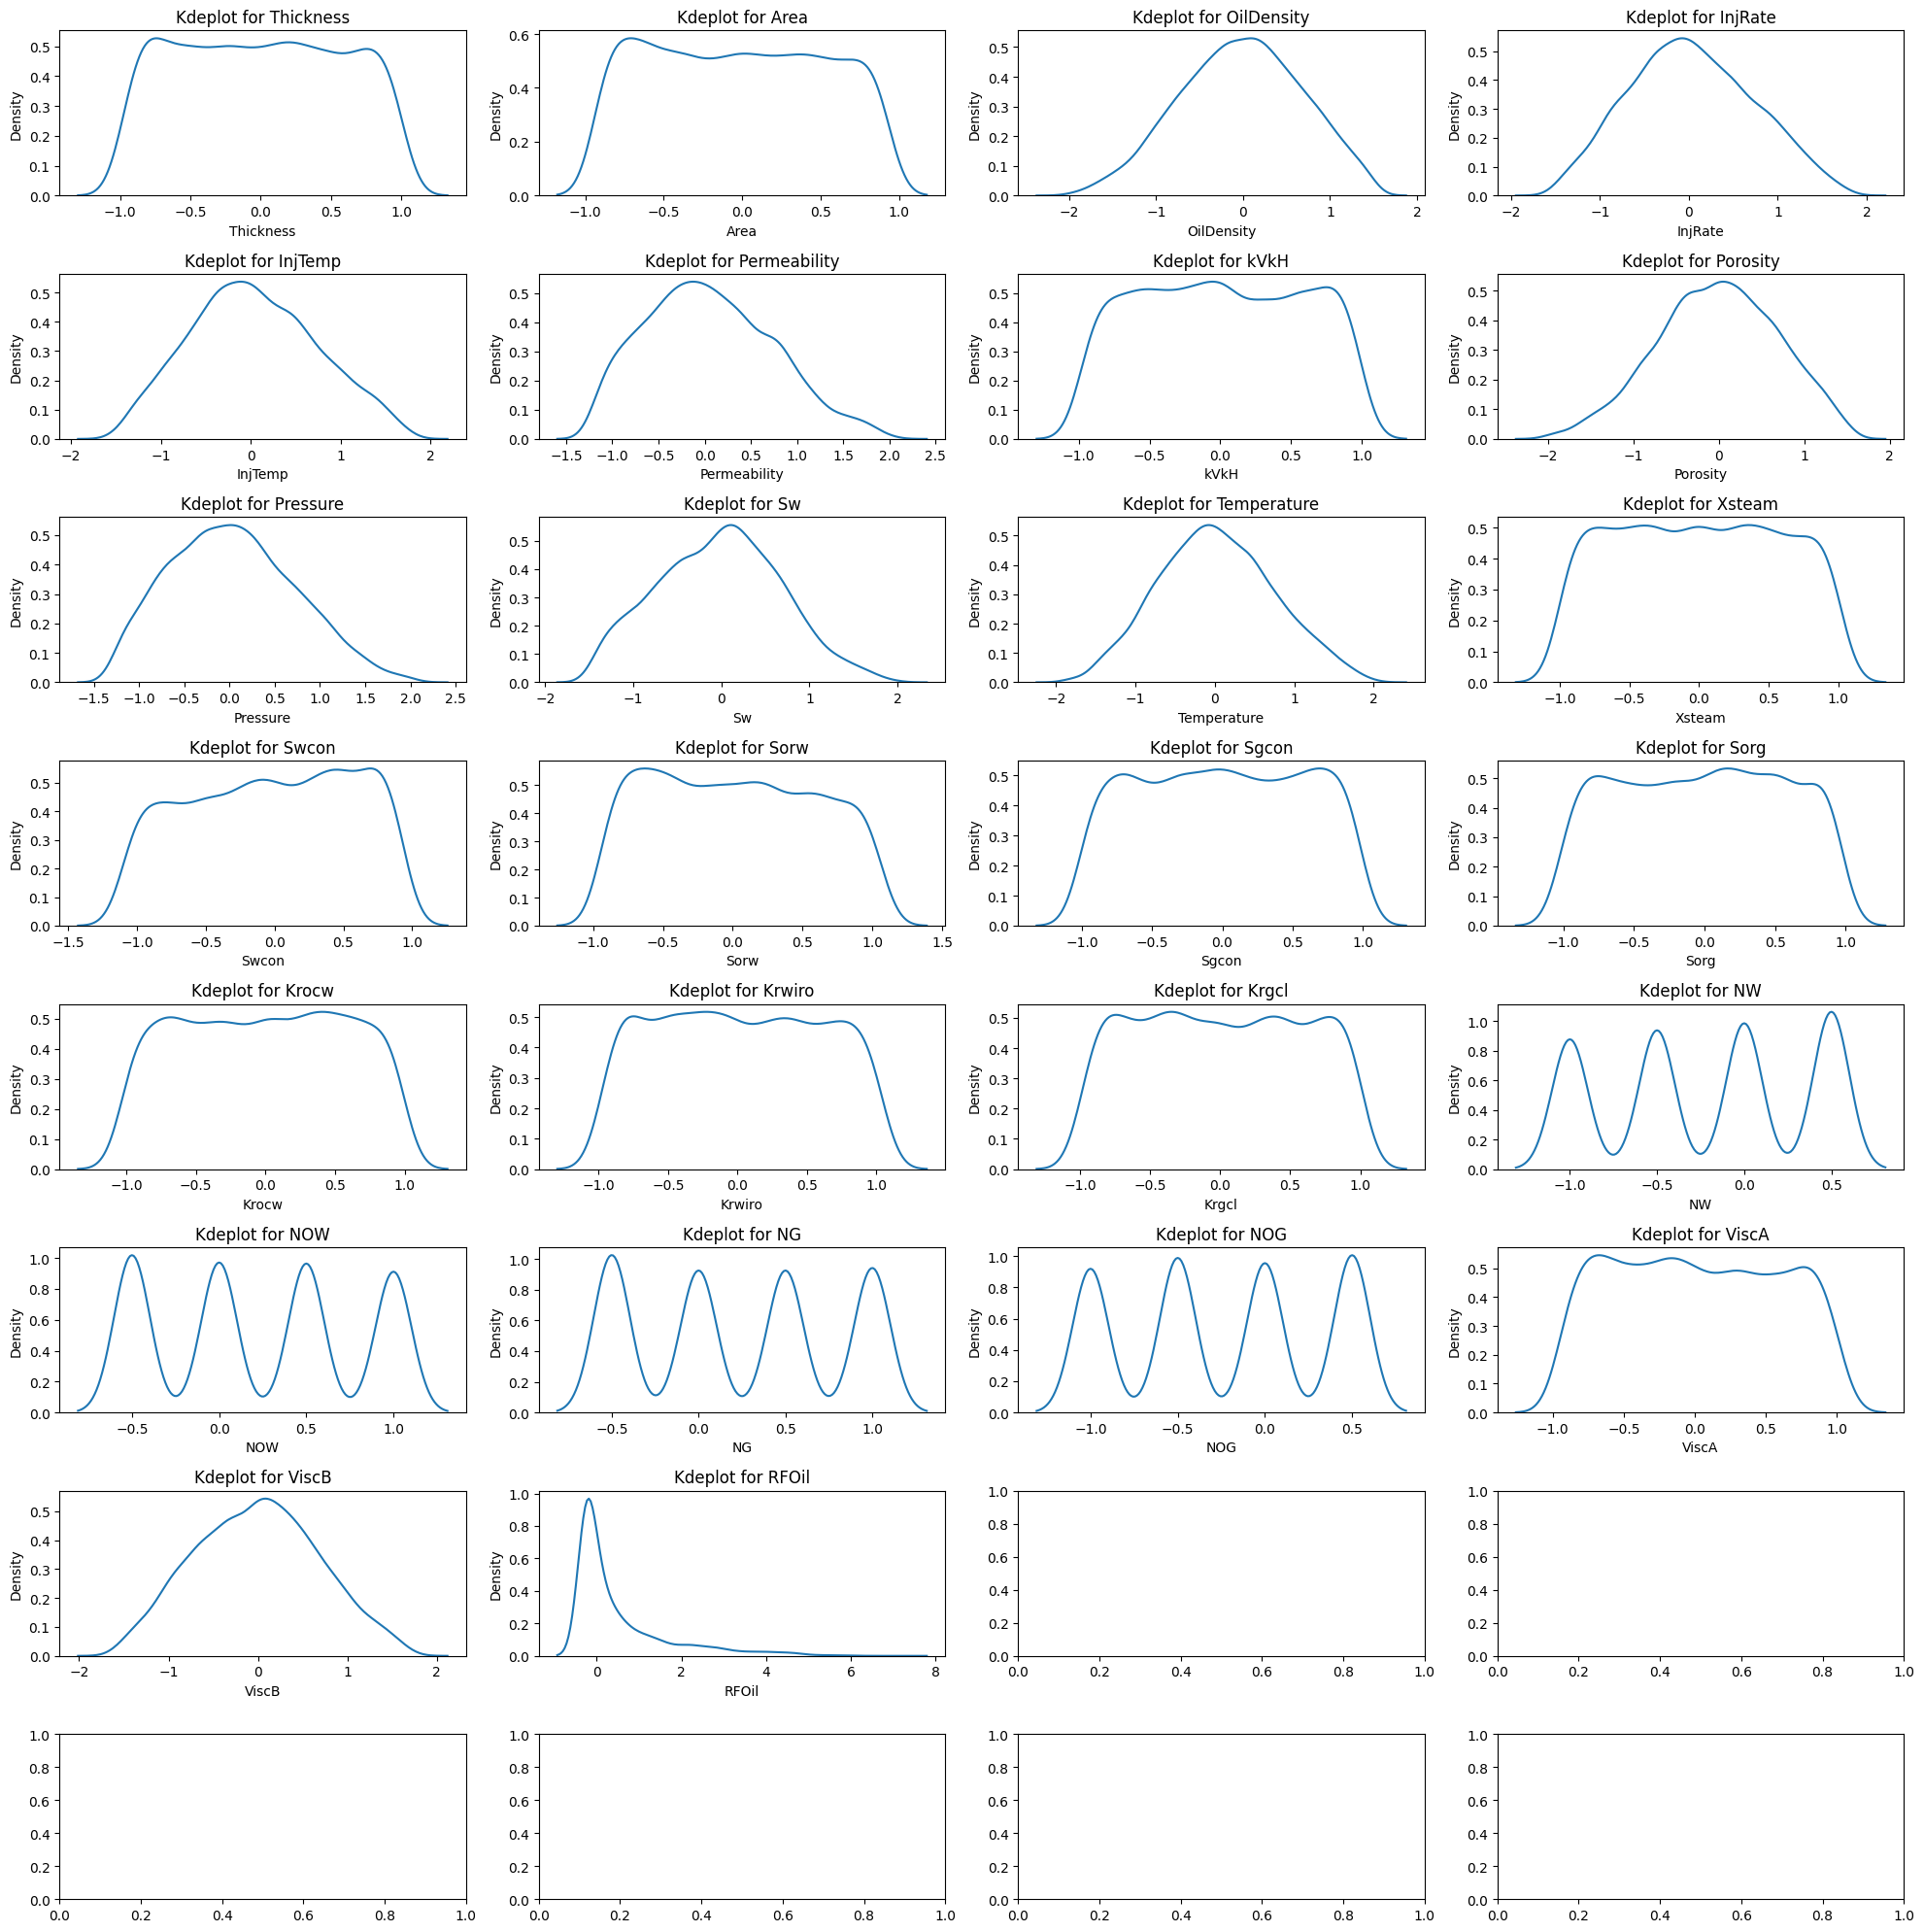

In [38]:
# Checking distribution after scaling
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(X_train.columns) :
    sns.kdeplot(data=X_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

plt.tight_layout()
plt.show()

In [39]:
X_train

Thickness   Area  OilDensity   InjRate   InjTemp  Permeability  \
869    0.974150 -0.375   -0.359459 -0.247819  0.345849     -0.907391   
5663   1.000574  0.625   -0.230157 -0.580115 -0.166808     -0.665904   
400    0.169173 -0.125   -1.164945  1.011642 -0.852628     -0.344583   
4489  -0.962940  0.750   -1.199482  0.312044 -0.401981     -0.386760   
2448   0.446206 -0.500    0.303242  1.099762 -0.161119      0.992704   
...         ...    ...         ...       ...       ...           ...   
3865   0.998136 -0.875   -0.364350 -0.651754  1.499407      0.643689   
5326  -0.335998  0.125   -1.014160 -0.087746 -0.250608      0.944421   
5365   0.494175 -0.625    0.890191  0.448523 -0.020537      0.131886   
5537   0.743116  0.750    0.191610  0.264075 -0.332034      0.089591   
892   -0.687711  0.375   -0.156493 -0.164561 -0.473739     -1.020012   

          kVkH  Porosity  Pressure        Sw  Temperature    Xsteam     Swcon  \
869   0.883157  0.442953  0.142745 -0.463913    -0.200387  0.819639  0.453598   
5663  0.036515 -0.605921 -0.398959 -0.148987     0.187786  0.328285 -0.464173   
400  -0.112901  0.276774  1.906560  0.755465    -0.140580  0.677369 -0.158822   
4489  0.532603 -1.633687 -0.040245  0.123955     0.575495 -0.490545 -0.818490   
2448  0.576922 -0.013268 -0.518523 -0.391572    -1.273509 -0.256728  0.009546   
...        ...       ...       ...       ...          ...       ...       ...   
3865  0.171000 -0.409810 -0.377710  0.157112    -0.974879  0.054552 -0.120362   
5326 -0.615614  0.353242  0.331432  1.059067     1.059768  0.322282  0.693726   
5365 -0.677299 -1.053736  1.381652  0.867538    -1.238766  0.753565 -0.757034   
5537 -0.691635 -1.618826  1.108387  0.393301     0.770977  0.063226  0.425375   
892   0.778848  0.171490  1.149709 -0.140090     0.252773  0.317891 -0.152234   

          Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl   NW  NOW  \
869  -0.516240  0.023635  0.336169  0.701379 -0.451922  0.726424  0.0  1.0   
5663  0.157500  0.766023  0.290265  0.287678 -0.672262 -0.314764 -1.0 -0.5   
400  -0.737575 -0.891901  0.845851  0.152818 -0.905943  0.067230 -0.5  0.5   
4489  0.300137 -0.805727 -0.390811  0.174722  0.649741  0.994460  0.0  0.0   
2448  0.474827  0.018505  0.940853 -0.471878 -0.230176  0.461927 -1.0 -0.5   
...        ...       ...       ...       ...       ...       ...  ...  ...   
3865 -0.256661  0.726087 -0.607197 -0.091702 -0.547054 -0.817057  0.5  0.0   
5326 -0.628194  0.967069  0.134374 -0.082958 -0.006453 -0.068169  0.5  1.0   
5365  0.581764 -0.801222  0.708978 -0.720555 -0.037004 -0.416282  0.0  0.0   
5537  0.738053 -0.792876 -0.082014  0.213710 -0.738222  0.050716 -1.0  0.0   
892  -0.491386  0.199014  0.094500 -1.011739 -0.969227 -0.554649 -0.5  0.5   

       NG  NOG     ViscA     ViscB     RFOil  
869   0.5 -1.0  0.058619  0.600659 -0.238079  
5663  0.5  0.0 -0.753177 -1.062848  0.903770  
400  -0.5 -0.5 -0.669049  0.171162  0.001848  
4489  1.0 -1.0 -0.827555 -0.397846  0.225203  
2448  1.0 -0.5  0.952715 -0.077266  1.137495  
...   ...  ...       ...       ...       ...  
3865  0.5  0.0  0.125185 -0.202635  1.397019  
5326  1.0 -1.0 -0.191146 -0.696693  0.534087  
5365  1.0  0.5  0.106905 -0.643813 -0.285302  
5537  1.0  0.5  0.713447 -0.630599 -0.270555  
892   0.0  0.5 -0.407274  0.580607 -0.242806  

[4630 rows x 26 columns]

In [40]:
X_test

Thickness   Area  OilDensity   InjRate   InjTemp  Permeability  \
5085  -0.174619  0.250   -1.051960  0.801868 -0.249789     -0.994798   
4856  -0.111874 -0.750    0.102009  1.038532  0.496556     -0.476222   
1084  -0.888888  0.875    0.561751 -0.216849 -0.001027      0.041381   
1744   0.859911 -0.875   -0.618519 -0.136897 -0.156524      0.309265   
162    0.613221  0.375   -0.189532  0.359073 -0.286928     -1.058451   
...         ...    ...         ...       ...       ...           ...   
4796   0.512536 -0.750   -1.500955  0.406305 -0.469412      0.625911   
5837   0.909620  0.375    0.776472 -0.548989 -0.401119     -0.074063   
5455  -0.045073  0.125   -0.618079  0.493112 -0.224144      0.916017   
209   -0.915195  0.625    0.521129 -0.890289 -1.307050      1.718642   
348   -0.742180 -0.625   -0.132567  0.109215  1.053000     -0.291623   

          kVkH  Porosity  Pressure        Sw  Temperature    Xsteam     Swcon  \
5085  0.742141  0.685985 -0.961116  0.074685     0.093738 -0.477000  0.141291   
4856 -0.392207  1.193391 -0.383946  0.727513    -0.165041  0.022727  0.922561   
1084 -0.857244 -0.556620 -0.532164  0.439025    -0.198315 -0.174203  0.335761   
1744  0.174788  1.112421 -0.310372  0.702545    -0.242573  0.203814 -0.455711   
162   0.208651  0.180388 -0.614410 -0.908798    -0.480315 -0.836270  0.455759   
...        ...       ...       ...       ...          ...       ...       ...   
4796 -0.289386 -0.535675  1.299886  0.840247     0.140860 -0.064471  0.898848   
5837  0.549186  1.101809  0.219180  0.192772     0.170101 -0.914674 -0.796500   
5455  0.196800 -0.298478 -0.046708 -0.220607    -0.622635 -0.679984 -0.315154   
209   0.508139 -0.839657  0.023157 -0.566211     0.835691  0.276646  0.209196   
348  -0.003067  0.379217 -0.655412 -0.663500    -0.861926  0.454351  0.481240   

          Sorw     Sgcon      Sorg     Krocw    Krwiro     Krgcl   NW  NOW  \
5085 -0.204901  0.067994  0.466010 -0.133731 -0.080351 -0.504105 -0.5  0.5   
4856 -0.779290 -0.432090 -0.138334 -0.892995  0.838527  0.373312 -1.0  0.0   
1084 -0.489087 -0.289471 -1.004554 -0.386938 -0.589176 -0.552691 -0.5  1.0   
1744 -0.346331  0.682440 -0.160332 -0.121977 -0.513648 -0.952635 -1.0 -0.5   
162   0.171614 -0.180681 -0.920108  0.236305  0.598021  0.391539  0.0  0.0   
...        ...       ...       ...       ...       ...       ...  ...  ...   
4796  0.839871  0.210452 -0.777149  0.959104  0.893056 -0.569008  0.5  0.0   
5837 -0.128162 -0.090374 -1.009277  0.265778 -0.670005  0.641619 -0.5  0.0   
5455  0.850583 -0.900958  0.419054  0.470536  0.304935  0.173041  0.0 -0.5   
209  -0.268814  0.876047  0.002729  0.822725 -0.360292 -0.798197  0.0  1.0   
348  -0.312671  0.943337 -0.844147 -0.114323  1.013904  0.952153  0.0  0.0   

       NG  NOG     ViscA     ViscB     RFOil  
5085 -0.5 -0.5  0.787305  0.386230 -0.253205  
4856  0.5 -1.0  0.254388 -0.020815 -0.257517  
1084  0.5 -0.5  0.198469  0.232183 -0.269991  
1744  1.0  0.5 -0.486147 -1.500779  0.733646  
162   1.0  0.0 -0.525750 -0.568673  0.434412  
...   ...  ...       ...       ...       ...  
4796  1.0  0.0 -0.128233  0.366501  0.103604  
5837  1.0  0.0 -0.420709  0.431122 -0.249815  
5455  0.0 -1.0  0.420730 -1.232873  2.046314  
209   0.0 -1.0 -0.346478  1.355930  0.298394  
348   0.5  0.5 -0.410568  0.445138  0.056050  

[1158 rows x 26 columns]

In [41]:
y_train

869     19
5663    15
400     11
4489    18
2448    20
        ..
3865    26
5326    26
5365    11
5537    27
892     29
Name: InjectionPeriod, Length: 4630, dtype: int64

In [42]:
y_test

5085    25
4856    24
1084     7
1744    10
162     15
        ..
4796    11
5837    28
5455    30
209     23
348      8
Name: InjectionPeriod, Length: 1158, dtype: int64

#### Deep Learning Modified

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 19.9113 - mean_absolute_error: 18.5825 - r2_score: -7.4391 - root_mean_squared_error: 19.8608 - val_loss: 19.6406 - val_mean_absolute_error: 18.8214 - val_r2_score: -6.9619 - val_root_mean_squared_error: 20.1312 - learning_rate: 0.0010
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1258 - mean_absolute_error: 18.4209 - r2_score: -7.0899 - root_mean_squared_error: 19.7549 - val_loss: 19.1024 - val_mean_absolute_error: 18.6644 - val_r2_score: -6.8461 - val_root_mean_squared_error: 19.9842 - learning_rate: 0.0010
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.4753 - mean_absolute_error: 18.1001 - r2_score: -7.0500 - root_mean_squared_error: 19.4370 - val_loss: 18.8432 - val_mean_absolute_error: 18.6362 - val_r2_score: -6.8238 - val_root_mean_squared_error: 19.9558 - learning_rate: 0.0010
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 18.1811 - mean_absolute_error: 18.0144 - r2_score: 

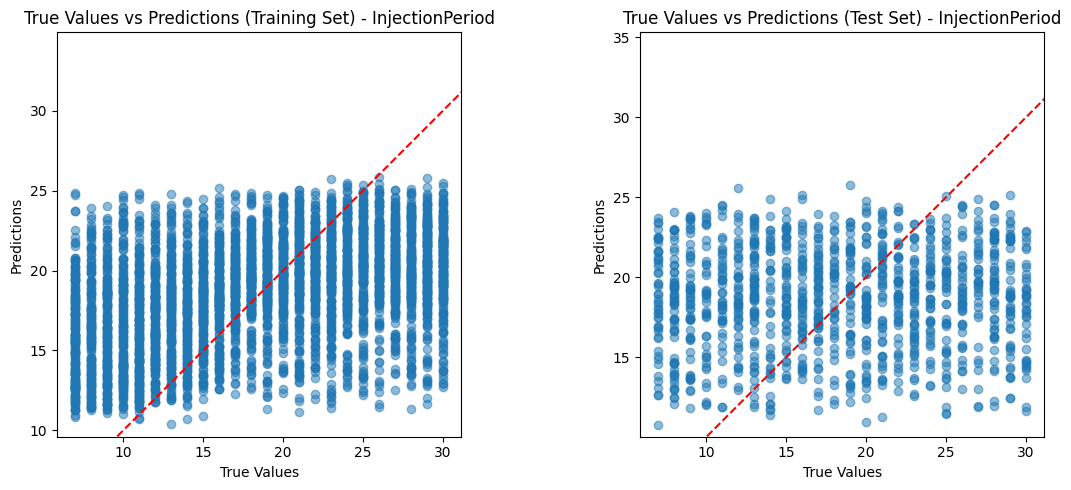

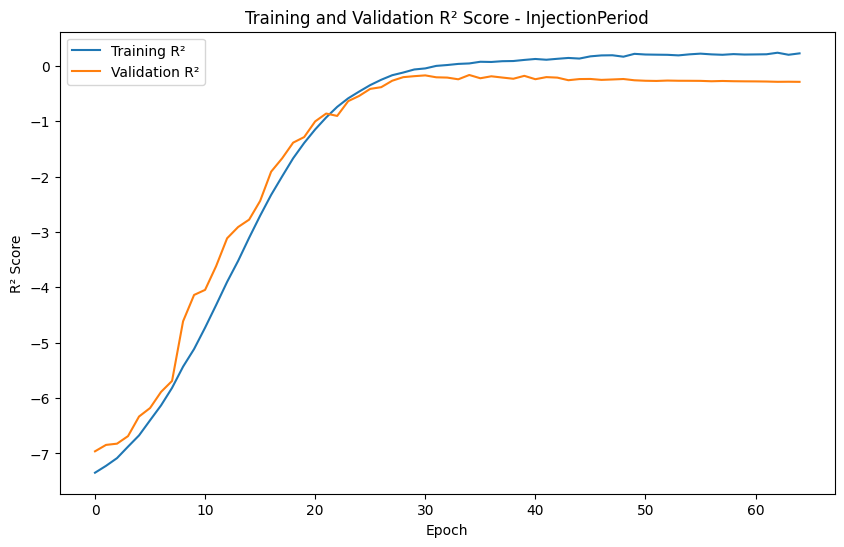

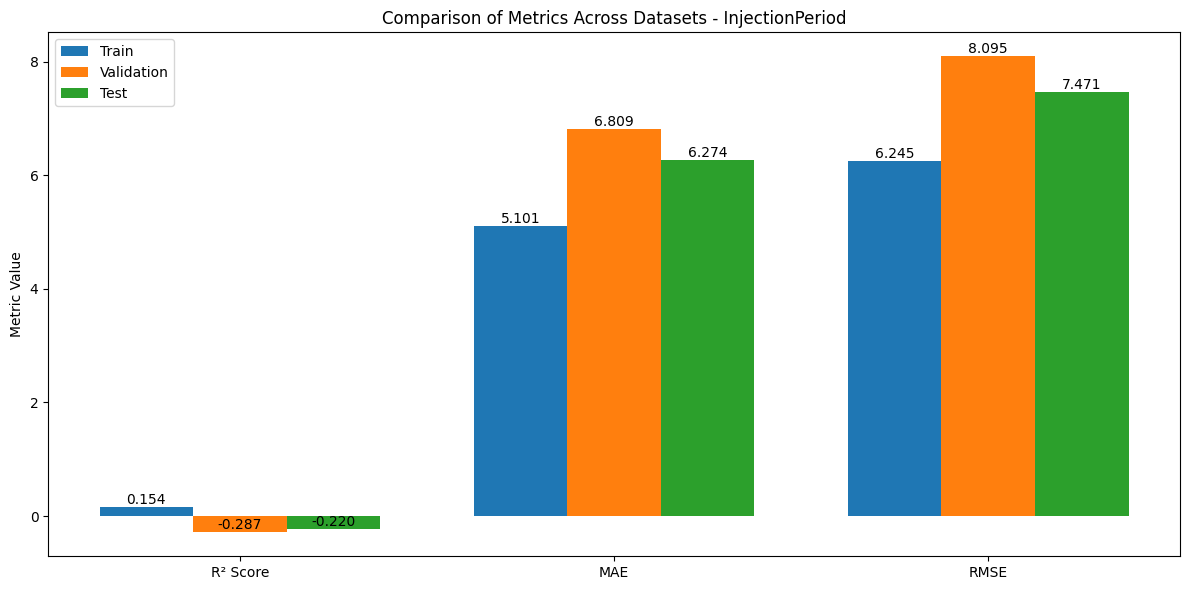

In [45]:
# Trial using neural network (architecture modified)

# Custom R² metric
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_mean = tf.reduce_mean(y_true)
        sum_squared_residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        sum_squared_total = tf.reduce_sum(tf.square(y_true - y_mean))
        self.sum_squared_residuals.assign_add(sum_squared_residuals)
        self.sum_squared_total.assign_add(sum_squared_total)

    def result(self):
        return 1 - self.sum_squared_residuals / (self.sum_squared_total + tf.keras.backend.epsilon())

    def reset_state(self):
        self.sum_squared_residuals.assign(0)
        self.sum_squared_total.assign(0)

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(
            units=512,  # Increased number of units
            activation='relu',
            input_shape=input_shape,
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),  # Increased dropout rate

        keras.layers.Dense(
            units=256,  # Increased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.5),  # Increased dropout rate

        keras.layers.Dense(
            units=128,  # Increased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),  # Slightly increased dropout rate

        keras.layers.Dense(
            units=64,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=32,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=16,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(
            units=8,  # Decreased number of units
            activation='relu',
            kernel_initializer='he_normal',  # Changed initializer
            bias_initializer='zeros',
            kernel_regularizer=keras.regularizers.l2(0.001),
            activity_regularizer=None,
            kernel_constraint=None
        ),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(1)  # Output layer
    ])
    return model


model = build_model((X_train.shape[1],))

# Step 2: Compile the model with Huber loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=[R2Score(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_r2_score', 
    mode='max', 
    patience=30, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_r2_score', 
    mode='max', 
    factor=0.2, 
    patience=10,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_r2, train_mae, train_rmse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_r2, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Training Set) - InjectionPeriod')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Test Set) - InjectionPeriod')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Training R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.title('Training and Validation R² Score - InjectionPeriod')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['R² Score', 'MAE', 'RMSE']
train_metrics = [train_r2, train_mae, train_rmse]
val_metrics = [history.history['val_r2_score'][-1], history.history['val_mean_absolute_error'][-1], history.history['val_root_mean_squared_error'][-1]]
test_metrics = [test_r2, test_mae, test_rmse]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets - InjectionPeriod')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 18.1381 - mean_absolute_error: 18.2624 - r2_score: -7.1369 - root_mean_squared_error: 19.5458 - val_loss: 18.3236 - val_mean_absolute_error: 18.4488 - val_r2_score: -6.6879 - val_root_mean_squared_error: 19.7818 - learning_rate: 0.0010
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1011 - mean_absolute_error: 17.2263 - r2_score: -6.1801 - root_mean_squared_error: 18.6443 - val_loss: 17.6390 - val_mean_absolute_error: 17.7646 - val_r2_score: -6.2017 - val_root_mean_squared_error: 19.1460 - learning_rate: 0.0010
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.8859 - mean_absolute_error: 16.0104 - r2_score: -5.5837 - root_mean_squared_error: 17.5390 - val_loss: 16.6746 - val_mean_absolute_error: 16.7995 - val_r2_score: -5.5432 - val_root_mean_squared_error: 18.2497 - learning_rate: 0.0010
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.3894 - mean_absolute_error: 14.5113 - r2_score: -

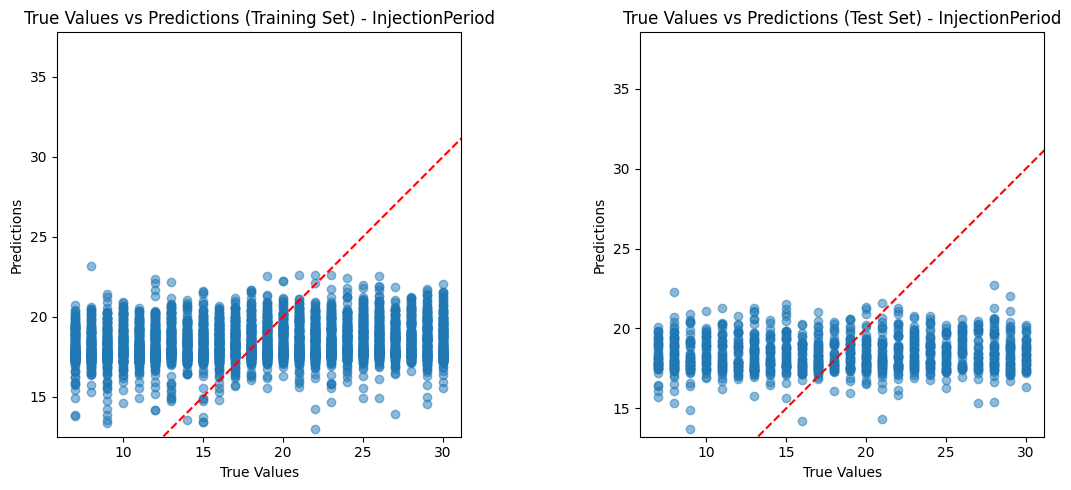

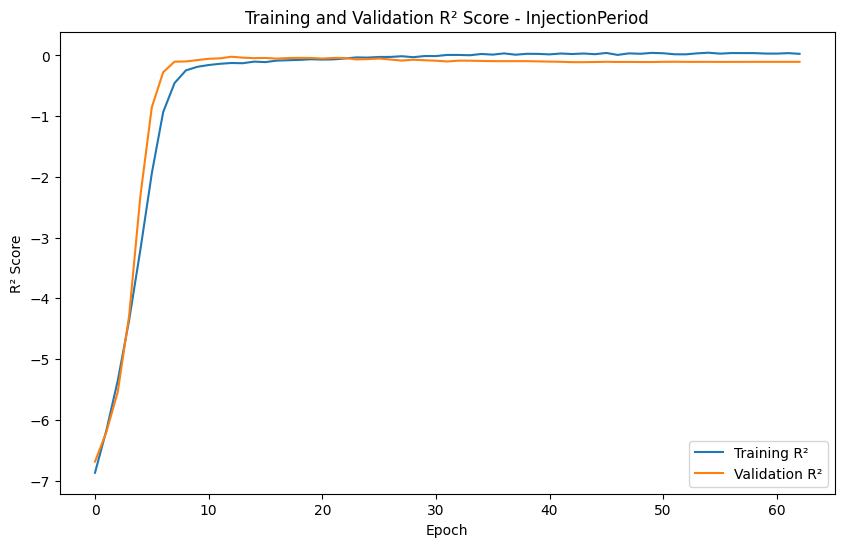

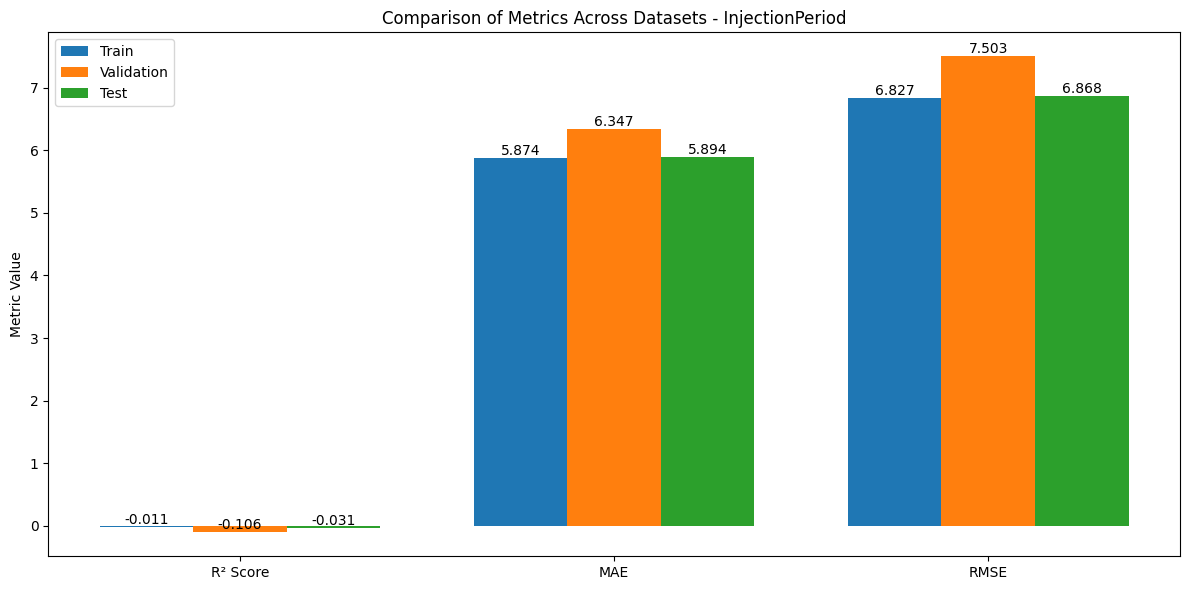

In [46]:
# Trial using neural network (architecture non-modified)

# Custom R² metric
class R2Score(tf.keras.metrics.Metric):
    def __init__(self, name='r2_score', **kwargs):
        super().__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)
        y_mean = tf.reduce_mean(y_true)
        sum_squared_residuals = tf.reduce_sum(tf.square(y_true - y_pred))
        sum_squared_total = tf.reduce_sum(tf.square(y_true - y_mean))
        self.sum_squared_residuals.assign_add(sum_squared_residuals)
        self.sum_squared_total.assign_add(sum_squared_total)

    def result(self):
        return 1 - self.sum_squared_residuals / (self.sum_squared_total + tf.keras.backend.epsilon())

    def reset_state(self):
        self.sum_squared_residuals.assign(0)
        self.sum_squared_total.assign(0)

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Step 1: Define the model architecture with L2 regularization
def build_model(input_shape):
    model = keras.Sequential([
        keras.layers.Dense(256, activation='relu', input_shape=input_shape, kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])
    return model

model = build_model((X_train.shape[1],))

# Step 2: Compile the model with Huber loss
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.Huber(),
              metrics=[R2Score(), tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()])

# Step 3: Define callbacks for early stopping and learning rate reduction
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_r2_score', 
    mode='max', 
    patience=50, 
    restore_best_weights=True
)
lr_reducer = keras.callbacks.ReduceLROnPlateau(
    monitor='val_r2_score', 
    mode='max', 
    factor=0.1, 
    patience=20,
    min_lr=1e-6
)

# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=128,
    validation_split=0.05,
    callbacks=[early_stopping, lr_reducer],
    verbose=1
)

# Step 6: Evaluate the model on the test set and training set
train_loss, train_r2, train_mae, train_rmse = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_r2, test_mae, test_rmse = model.evaluate(X_test, y_test, verbose=0)

print("Training Set Metrics:")
print(f"Train Loss: {train_loss:.4f}")
print(f"Train R² Score: {train_r2:.4f}")
print(f"Train MAE: {train_mae:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")

print("\nTest Set Metrics:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 7: Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Step 8: Visualize the results
plt.figure(figsize=(12, 5))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Training Set) - InjectionPeriod')

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.plot([-100, 100], [-100, 100], color='red', linestyle='--')
plt.title('True Values vs Predictions (Test Set) - InjectionPeriod')

plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['r2_score'], label='Training R²')
plt.plot(history.history['val_r2_score'], label='Validation R²')
plt.title('Training and Validation R² Score - InjectionPeriod')
plt.xlabel('Epoch')
plt.ylabel('R² Score')
plt.legend()
plt.show()

# Add a new plot to compare final metrics
plt.figure(figsize=(12, 6))
metrics = ['R² Score', 'MAE', 'RMSE']
train_metrics = [train_r2, train_mae, train_rmse]
val_metrics = [history.history['val_r2_score'][-1], history.history['val_mean_absolute_error'][-1], history.history['val_root_mean_squared_error'][-1]]
test_metrics = [test_r2, test_mae, test_rmse]

x = range(len(metrics))
width = 0.25

# Function to make label on top of each individual bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', rotation=0)

train_bars = plt.bar([i - width for i in x], train_metrics, width, label='Train', align='center')
val_bars = plt.bar(x, val_metrics, width, label='Validation', align='center')
test_bars = plt.bar([i + width for i in x], test_metrics, width, label='Test', align='center')

autolabel(train_bars)
autolabel(val_bars)
autolabel(test_bars)

plt.ylabel('Metric Value')
plt.title('Comparison of Metrics Across Datasets - InjectionPeriod')
plt.xticks(x, metrics)
plt.legend()

# Adjust the plot to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

The hyperparameters in the code I provided are a good starting point, but they're not necessarily optimized for best performance. Optimal hyperparameters can vary significantly depending on the specific dataset and problem. Here's my perspective on the current hyperparameters and potential areas for improvement:

1. Network architecture:
   - The current architecture (128-64-32-16-8 neurons) is reasonably deep and wide, but it might not be optimal for your specific problem.
   - You could experiment with different numbers of layers and neurons per layer.

2. Learning rate:
   - The current learning rate (0.001) is a common default, but it might not be ideal for your case.
   - You could try a learning rate scheduler or different initial learning rates.

3. Batch size:
   - The current batch size (32) is a common choice, but you might get better results with a different value.
   - Try values like 16, 64, or 128 to see if they improve performance.

4. Dropout rate:
   - The current dropout rate (0.3) is moderate. You could try different rates (e.g., 0.2, 0.4, 0.5) to see if they improve generalization.

5. Early stopping patience:
   - The current patience (20 epochs) might be too long or too short depending on your dataset size and complexity.

6. Learning rate reduction:
   - The current factor (0.5) and patience (5 epochs) for learning rate reduction could be adjusted.

7. Activation functions:
   - We're using ReLU activation, which is a good default, but you could experiment with others like LeakyReLU or ELU.

8. Optimizer:
   - We're using Adam, which is generally a good choice, but you could try others like RMSprop or SGD with momentum.

To find the best hyperparameters, you could:

1. Use random search or grid search with cross-validation to explore different combinations of hyperparameters.

2. Use more advanced hyperparameter optimization techniques like Bayesian optimization (e.g., using libraries like Optuna or Hyperopt).

3. Try automated machine learning (AutoML) tools that can search for optimal architectures and hyperparameters.

Here's an example of how you might set up a simple random search:

```python
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def create_model(neurons1=128, neurons2=64, neurons3=32, dropout_rate=0.3, learning_rate=0.001):
    model = keras.Sequential([
        keras.layers.Dense(neurons1, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(neurons2, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(neurons3, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.RSquare()])
    return model

model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

param_dist = {
    'neurons1': [64, 128, 256],
    'neurons2': [32, 64, 128],
    'neurons3': [16, 32, 64],
    'dropout_rate': [0.2, 0.3, 0.4],
    'learning_rate': [0.0001, 0.001, 0.01],
    'batch_size': [16, 32, 64]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, cv=3, scoring='r2')
random_search_results = random_search.fit(X_train_scaled, y_train)

print("Best parameters:", random_search_results.best_params_)
print("Best R² score:", random_search_results.best_score_)
```

This script will perform a random search over the specified hyperparameter space. You can adjust the ranges and add more hyperparameters as needed.

Remember, hyperparameter optimization can be computationally expensive, so you might need to run this on a powerful machine or cloud service if you have a large dataset or complex model.

# **STAGE 3 : MODELLING AND EVALUATION**

### Helper Function

First we will define some functions that will help us in the process of training and evaluation.

In [41]:
# Import metrics score that will be evalueated
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import time

# Evaluation score calculation
def eval_regression(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # Print evaluation scores
    print(f"MAE Score (Test Set): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MAE Score (Train Set): {mean_absolute_error(y_train, y_pred_train):.2f}")

    print(f"RMSE Score (Test Set): {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"RMSE Score (Train Set): {mean_squared_error(y_train, y_pred_train, squared=False):.2f}")

    print(f"MAPE Score (Test Set): {mean_absolute_percentage_error(y_test, y_pred):.2f}")
    print(f"MAPE Score (Train Set): {mean_absolute_percentage_error(y_train, y_pred_train):.2f}")

    print(f"R2 Score (Test Set): {r2_score(y_test, y_pred):.2f}")
    print(f"R2 Score (Train Set): {r2_score(y_train, y_pred_train):.2f}")

    # Cross Validation
    cv = RepeatedKFold(n_splits=7, n_repeats=7, random_state=42)
    score = cross_validate(model, X_train, y_train, cv=cv, scoring='r2', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print(f"R2 Score (Crossval Test): {score['test_score'].mean():.2f}") 
    print(f"R2 Score (Crossval Train): {score['train_score'].mean():.2f}")

def grid_pipe(pipedict, hyperdict, scoring='r2', display=True):
    fitted_models = {}
    fit_time = []
    for name, pipeline in pipedict.items():

    # Construct grid search
        cv = RepeatedKFold(n_splits=7, n_repeats=7, random_state=42)
        model = GridSearchCV(estimator=pipeline,
                             param_grid=hyperdict[name],
                             scoring=scoring,
                             cv=cv, verbose=2, n_jobs=-1, return_train_score = True, error_score='raise')

        # Fit using grid search
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        fit_time.append(round(end-start, 2))

        # Append model
        fitted_models[name]=model
        if display:
            #Print when the model has been fitted
            print(f'The {name} model has been fitted.')
            # print fit time
            print('Total Fit Time: %.3fs' % (end-start))
            # Best accuracy
            print('Best R2 Score: %.3f' % model.best_score_)
            # Best params
            print('Best params:\n', model.best_params_,'\n')

    return fitted_models, fit_time

### Train Vanilla Models

In [42]:
# Import models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Initiatialize object for each model
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
mlp = MLPRegressor(random_state=42)


models = [svr, knn, dt, rf, gb, xgb, mlp]

# Train models
for model in models :
    model.fit(X_train, y_train)

### Evaluate Vanilla Models

#### SVM

In [43]:
eval_regression(svr)

MAE Score (Test Set): 2.76
MAE Score (Train Set): 2.69
RMSE Score (Test Set): 4.93
RMSE Score (Train Set): 5.26
MAPE Score (Test Set): 3.65
MAPE Score (Train Set): 2.84
R2 Score (Test Set): 0.57
R2 Score (Train Set): 0.59
R2 Score (Crossval Test): 0.53
R2 Score (Crossval Train): 0.57


#### K-Nearest Neighbours

In [44]:
eval_regression(knn)

MAE Score (Test Set): 4.07
MAE Score (Train Set): 3.47
RMSE Score (Test Set): 6.09
RMSE Score (Train Set): 5.25
MAPE Score (Test Set): 8.59
MAPE Score (Train Set): 6.31
R2 Score (Test Set): 0.34
R2 Score (Train Set): 0.59
R2 Score (Crossval Test): 0.38
R2 Score (Crossval Train): 0.59


#### Decision Tree

In [45]:
eval_regression(dt)

MAE Score (Test Set): 2.66
MAE Score (Train Set): 0.00
RMSE Score (Test Set): 4.88
RMSE Score (Train Set): 0.00
MAPE Score (Test Set): 0.80
MAPE Score (Train Set): 0.00
R2 Score (Test Set): 0.58
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): 0.56
R2 Score (Crossval Train): 1.00


#### Random Forest

In [46]:
eval_regression(rf)

MAE Score (Test Set): 1.91
MAE Score (Train Set): 0.72
RMSE Score (Test Set): 3.37
RMSE Score (Train Set): 1.33
MAPE Score (Test Set): 0.88
MAPE Score (Train Set): 0.32
R2 Score (Test Set): 0.80
R2 Score (Train Set): 0.97
R2 Score (Crossval Test): 0.81
R2 Score (Crossval Train): 0.97


#### GradientBoost

In [47]:
eval_regression(gb)

MAE Score (Test Set): 2.12
MAE Score (Train Set): 1.83
RMSE Score (Test Set): 3.31
RMSE Score (Train Set): 2.88
MAPE Score (Test Set): 3.95
MAPE Score (Train Set): 3.27
R2 Score (Test Set): 0.81
R2 Score (Train Set): 0.88
R2 Score (Crossval Test): 0.81
R2 Score (Crossval Train): 0.88


#### XGBoost

In [48]:
eval_regression(xgb)

MAE Score (Test Set): 1.70
MAE Score (Train Set): 0.23
RMSE Score (Test Set): 2.78
RMSE Score (Train Set): 0.32
MAPE Score (Test Set): 2.16
MAPE Score (Train Set): 0.48
R2 Score (Test Set): 0.86
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): 0.86
R2 Score (Crossval Train): 1.00


#### Multi Layer Perceptron (MLP)

In [49]:
eval_regression(mlp)

MAE Score (Test Set): 1.72
MAE Score (Train Set): 1.24
RMSE Score (Test Set): 2.42
RMSE Score (Train Set): 1.77
MAPE Score (Test Set): 4.90
MAPE Score (Train Set): 3.57
R2 Score (Test Set): 0.90
R2 Score (Train Set): 0.95
R2 Score (Crossval Test): 0.89
R2 Score (Crossval Train): 0.95


### Hyperparameter Tuning

In [223]:
?Pipeline

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
A sequence of data transformers with an optional final predictor.

`Pipeline` allows you to sequentially apply a list of transformers to
preprocess the data and, if desired, conclude the sequence with a final
:term:`predictor` for predictive modeling.

Intermediate steps of the pipeline must be 'transforms', that is, they
must implement `fit` and `transform` methods.
The final :term:`estimator` only needs to implement `fit`.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters. For this, it
enables setting parameters of the various steps using their names and the
parameter name separated by a `'__'`, as in the example below. A step's
estimator may be replaced entirely by setting the parameter with its name
to another estimator, or a transformer removed by sett

In [66]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Create pipeline for each of the classifiers.
pipelines = {'svr' : Pipeline([('rg', SVR())]),
             'knn': Pipeline([('rg', KNeighborsRegressor())]),
             'decisiontree': Pipeline([('rg', DecisionTreeRegressor(random_state = 42))]),
             'randomforest': Pipeline([('rg', RandomForestRegressor(random_state = 42))]),
             'gb': Pipeline([('rg', GradientBoostingRegressor(random_state = 42))]),
             'xgboost': Pipeline([('rg', XGBRegressor(random_state=42))]),
             'mlp' : Pipeline([('rg', MLPRegressor(random_state=42))])}

# Define Hyperparameters for each pipeline
hyperparameters_svr = {'rg__kernel': ['rbf', 'poly'],
                       'rg__C': [0.1, 1, 10],
                       'rg__gamma': [0.01, 0.1, 1],
                       'rg__epsilon': [0.01, 0.1, 1]}

hyperparameters_knn ={'rg__n_neighbors' : [int(x) for x in np.arange(1, 30)],
                      'rg__weights' : ['uniform', 'distance'],
                      'rg__p' : [1, 2],
                      'rg__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

hyperparameters_dt ={'rg__criterion' : ['squared_error', 'absolute_error'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__min_samples_split' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__max_features' : ['sqrt'],
                     'rg__splitter' : ['best']}

hyperparameters_rf ={'rg__n_estimators': [int(x) for x in np.linspace(50, 120, 5)],
                     'rg__criterion': ['squared_error', 'absolute_error'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__max_features':['sqrt'],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)]}

hyperparameters_gb ={'rg__n_estimators': [int(x) for x in np.linspace(50, 120, 5)],
                     'rg__criterion' : ['squared_error', 'friedman_mse'],
                     'rg__max_depth' : [int(x) for x in np.linspace(1, 10, num = 5)],
                     'rg__min_samples_split' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__min_samples_leaf' : [int(x) for x in np.linspace(2, 10, num = 5)],
                     'rg__max_features' : ['sqrt'],
                     'rg__loss' : ['squared_error', 'absolute_error']}

hyperparameters_xgb ={'rg__eta': [float(x) for x in np.linspace(0.1, 0.9, 10)],
                      'rg__gamma' : [float(x) for x in np.linspace(0, 3, num = 5)],
                      'rg__max_depth': [int(x) for x in np.linspace(1, 10, num = 5)],
                      'rg__nthread' : [2, 4, 6, 8],
                      'rg__tree_method' : ['approx', 'hist']}

hyperparameters_mlp ={'rg__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                     'rg__activation': ['tanh', 'relu'],
                     'rg__solver': ['sgd', 'adam'],
                     'rg__alpha': [0.0001, 0.05],
                     'rg__learning_rate': ['constant','adaptive'],
                     'rg__learning_rate_init': [0.001, 0.01, 0.1],
                     'rg__max_iter': [500, 1000, 1500]}

# Instantiate hyperparapeter dictionary
hyperparameters = {'svr' : hyperparameters_svr,
                   'knn':hyperparameters_knn,
                   'decisiontree':hyperparameters_dt,
                   'randomforest':hyperparameters_rf,
                   'gb':hyperparameters_gb,
                   'xgboost': hyperparameters_xgb,
                   'mlp' : hyperparameters_mlp}

In [ ]:
# Run the grid search
fitted_models, fit_time = grid_pipe(pipelines, hyperparameters, scoring='r2')

### Train Tuned Models

In [231]:
# Import models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Initiatialize object for each model
svr_tuned = SVR(C=1, epsilon=0.01, gamma=0.1, kernel='rbf')
knn_tuned = KNeighborsRegressor(algorithm='ball_tree', n_neighbors=25, p=1, weights='distance')
dt_tuned = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, splitter='best', random_state=42)
rf_tuned = RandomForestRegressor(n_estimators=85, criterion='absolute_error', max_depth=7, max_features='sqrt', min_samples_leaf=2, random_state=42)
gb_tuned = GradientBoostingRegressor(n_estimators=85, criterion='friedman_mse', loss='absolute_error', max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, random_state=42)
xgb_tuned = XGBRegressor(eta=0.3666666666666667, gamma=2.25, max_depth=3, nthread=2, tree_method='approx', random_state=42)
mlp_tuned = MLPRegressor(activation='relu', alpha=0.0001, hidden_layer_sizes=(100,), learning_rate='adaptive', learning_rate_init=0.001, max_iter=1000, solver='sgd', random_state=42)

models = [svr_tuned, knn_tuned, dt_tuned, rf_tuned, gb_tuned, xgb_tuned, mlp_tuned]

# Train models
for model in models :
    model.fit(X_train, y_train)

### Evaluate Tuned Models

#### SVM

In [232]:
eval_regression(svr_tuned)

MAE Score (Test Set): 0.55
MAE Score (Train Set): 0.14
RMSE Score (Test Set): 0.95
RMSE Score (Train Set): 0.48
MAPE Score (Test Set): 16.78
MAPE Score (Train Set): 2.19
R2 Score (Test Set): -0.01
R2 Score (Train Set): 0.58
R2 Score (Crossval Test): 0.32
R2 Score (Crossval Train): 0.58


#### GPR

In [233]:
eval_regression(gpr_tuned)

MAE Score (Test Set): 0.47
MAE Score (Train Set): 0.04
RMSE Score (Test Set): 1.05
RMSE Score (Train Set): 0.10
MAPE Score (Test Set): 1.00
MAPE Score (Train Set): 6.58
R2 Score (Test Set): -0.24
R2 Score (Train Set): 0.98
R2 Score (Crossval Test): 0.19
R2 Score (Crossval Train): 0.98


#### K-Nearest Neighbours

In [234]:
eval_regression(knn_tuned)

MAE Score (Test Set): 0.52
MAE Score (Train Set): 0.00
RMSE Score (Test Set): 0.93
RMSE Score (Train Set): 0.00
MAPE Score (Test Set): 25.49
MAPE Score (Train Set): 0.00
R2 Score (Test Set): 0.03
R2 Score (Train Set): 1.00
R2 Score (Crossval Test): 0.04
R2 Score (Crossval Train): 1.00


#### Decision Tree

In [235]:
eval_regression(dt_tuned)

MAE Score (Test Set): 0.52
MAE Score (Train Set): 0.28
RMSE Score (Test Set): 1.12
RMSE Score (Train Set): 0.70
MAPE Score (Test Set): 41.19
MAPE Score (Train Set): 5.49
R2 Score (Test Set): -0.41
R2 Score (Train Set): 0.11
R2 Score (Crossval Test): 0.01
R2 Score (Crossval Train): 0.17


#### Random Forest

In [236]:
eval_regression(rf_tuned)

MAE Score (Test Set): 0.73
MAE Score (Train Set): 0.24
RMSE Score (Test Set): 1.00
RMSE Score (Train Set): 0.52
MAPE Score (Test Set): 42.99
MAPE Score (Train Set): 9.69
R2 Score (Test Set): -0.11
R2 Score (Train Set): 0.51
R2 Score (Crossval Test): 0.18
R2 Score (Crossval Train): 0.49


#### GradientBoost

In [237]:
eval_regression(gb_tuned)

MAE Score (Test Set): 0.57
MAE Score (Train Set): 0.12
RMSE Score (Test Set): 0.96
RMSE Score (Train Set): 0.44
MAPE Score (Test Set): 27.57
MAPE Score (Train Set): 0.63
R2 Score (Test Set): -0.03
R2 Score (Train Set): 0.64
R2 Score (Crossval Test): 0.27
R2 Score (Crossval Train): 0.65


#### XGBoost

In [238]:
eval_regression(xgb_tuned)

MAE Score (Test Set): 0.83
MAE Score (Train Set): 0.31
RMSE Score (Test Set): 1.11
RMSE Score (Train Set): 0.50
MAPE Score (Test Set): 51.04
MAPE Score (Train Set): 19.05
R2 Score (Test Set): -0.39
R2 Score (Train Set): 0.54
R2 Score (Crossval Test): -0.01
R2 Score (Crossval Train): 0.55


#### Multi Layer Perceptron (MLP)

In [239]:
eval_regression(mlp_tuned)

MAE Score (Test Set): 4.97
MAE Score (Train Set): 0.30
RMSE Score (Test Set): 6.86
RMSE Score (Train Set): 0.50
MAPE Score (Test Set): 296.97
MAPE Score (Train Set): 25.60
R2 Score (Test Set): -51.76
R2 Score (Train Set): 0.54
R2 Score (Crossval Test): -0.02
R2 Score (Crossval Train): 0.58


## Model Comparison

In [240]:
# Creating models dict
models_dict = {}
models_dict['svr'] = svr_tuned
models_dict['gpr'] = gpr_tuned
models_dict['knn'] = knn_tuned
models_dict['dt'] = dt_tuned
models_dict['rf'] = rf_tuned
models_dict['gb'] = gb_tuned
models_dict['xgb'] = xgb_tuned
models_dict['mlp'] = mlp_tuned